# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [2]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [ ]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    Yplus = Y_train[ Y_train == 1 ]
    a = Yplus.shape[0] / (Y_train.shape[0])
    Xplus = X_train[Y_train==1]
    Muplus = np.sum(Xplus, axis=0) / Xplus.shape[0]
    Xminus = X_train[Y_train==-1]
    Muminus = np.sum(Xminus, axis=0) / Xminus.shape[0]
    W = Muminus - Muplus
    b = (0.5) * ((np.linalg.norm(Muplus))**2 - (np.linalg.norm(Muminus))**2)
    b = np.asarray([b for i in range(X_test.shape[0])])
    Y_test_pred = (np.matmul(X_test, W) + b)
    Y_test_pred = ((1/a) - 1) * np.exp(Y_test_pred)
    Y_test_pred = np.asarray([1/ (1+x) for x in Y_test_pred])
    for i in range(Y_test_pred.shape[0]):
      if Y_test_pred[i] > 1/2:
        Y_test_pred[i] = 1
      else:
        Y_test_pred[i] = -1
    return Y_test_pred
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = Y_train.shape[0]
    d = X_train.shape[1]
    m = X_test.shape[0]
    Yplus = Y_train[ Y_train == 1 ]
    ap = Yplus.shape[0] / (Y_train.shape[0])
    am = 1 - ap
    Xplus = X_train[Y_train==1]
    Muplus = np.sum(Xplus, axis=0) / Xplus.shape[0]
    Xminus = X_train[Y_train==-1]
    Muminus = np.sum(Xminus, axis=0) / Xminus.shape[0]
    XMp = np.asarray([X_train[i, :] - Muplus for i in range(n) if Y_train[i]==1])
    XMp = np.transpose(XMp)
    XMm = np.asarray([X_train[i, :] - Muminus for i in range(n) if Y_train[i]==-1])
    XMm = np.transpose(XMm)
    Sigma = np.matmul(XMp, np.transpose(XMp)) + np.matmul(XMm, np.transpose(XMm))
    Sigma = Sigma / n 
    Sigmainv = np.linalg.inv(Sigma)
    #print(Muplus.shape)
    Wp = np.matmul(Sigmainv, Muplus)
    Wm = np.matmul(Sigmainv, Muminus)
    bp = (-0.5) * np.matmul(Muplus, Wp) + np.log(ap)
    bm = (-0.5) * np.matmul(Muminus, Wm) + np.log(am)
    bp = np.asarray([bp for i in range(X_test.shape[0])])
    bm = np.asarray([bm for i in range(X_test.shape[0])])
    Yp = np.matmul(X_test, Wp) + bp 
    Ym = np.matmul(X_test, Wm) + bm
    Y_test_pred = np.ones(X_test.shape[0])
    for i in range(Y_test_pred.shape[0]):
      if Ym[i] > Yp[i]:
        Y_test_pred[i] = -1
    return Y_test_pred

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = Y_train.shape[0]
    d = X_train.shape[1]
    m = X_test.shape[0]
    Yplus = Y_train[ Y_train == 1 ]
    ap = Yplus.shape[0] / (Y_train.shape[0])
    am = 1 - ap
    Xplus = np.asarray([X_train[i, :] for i in range(Y_train.shape[0]) if Y_train[i]==1])
    Muplus = np.sum(Xplus, axis=0) / Xplus.shape[0]
    Xminus = np.asarray([X_train[i, :] for i in range(Y_train.shape[0]) if Y_train[i]==-1])
    Muminus = np.sum(Xminus, axis=0) / Xminus.shape[0]
    XMp = np.asarray([X_train[i, :] - Muplus for i in range(n) if Y_train[i]==1])
    XMp = np.transpose(XMp)
    XMm = np.asarray([X_train[i, :] - Muminus for i in range(n) if Y_train[i]==-1])
    XMm = np.transpose(XMm)
    Sigmap = np.matmul(XMp, np.transpose(XMp)) 
    Sigmam = np.matmul(XMm, np.transpose(XMm))
    Sigmap = Sigmap / (Yplus.shape[0] - 1)
    Sigmam = Sigmam / ((n - Yplus.shape[0]) - 1)
    Sigmapinv = np.linalg.inv(Sigmap)
    Sigmaminv = np.linalg.inv(Sigmam)
    X_testtrans = np.transpose(X_test)
    bp = np.log(ap) + (-0.5)*np.log(np.linalg.det(Sigmap))
    Wp = (-0.5) * np.asarray([np.matmul(np.matmul(np.transpose(X_test[i, :] - Muplus), Sigmapinv), (X_test[i, :] - Muplus)) for i in range(X_test.shape[0])])
    bm = np.log(am) + (-0.5)*np.log(np.linalg.det(Sigmam))
    Wm = (-0.5) * np.asarray([np.matmul(np.matmul(np.transpose(X_test[i, :] - Muminus), Sigmaminv), (X_test[i, :] - Muminus)) for i in range(X_test.shape[0])])
    bp = np.asarray([bp for i in range(X_test.shape[0])])
    bm = np.asarray([bm for i in range(X_test.shape[0])])
    Yp = Wp + bp
    Ym = Wm + bm
    Y_test_pred = np.ones(X_test.shape[0])
    for i in range(Y_test_pred.shape[0]):
      if Ym[i] > Yp[i]:
        Y_test_pred[i] = -1
    return Y_test_pred
    




In [ ]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


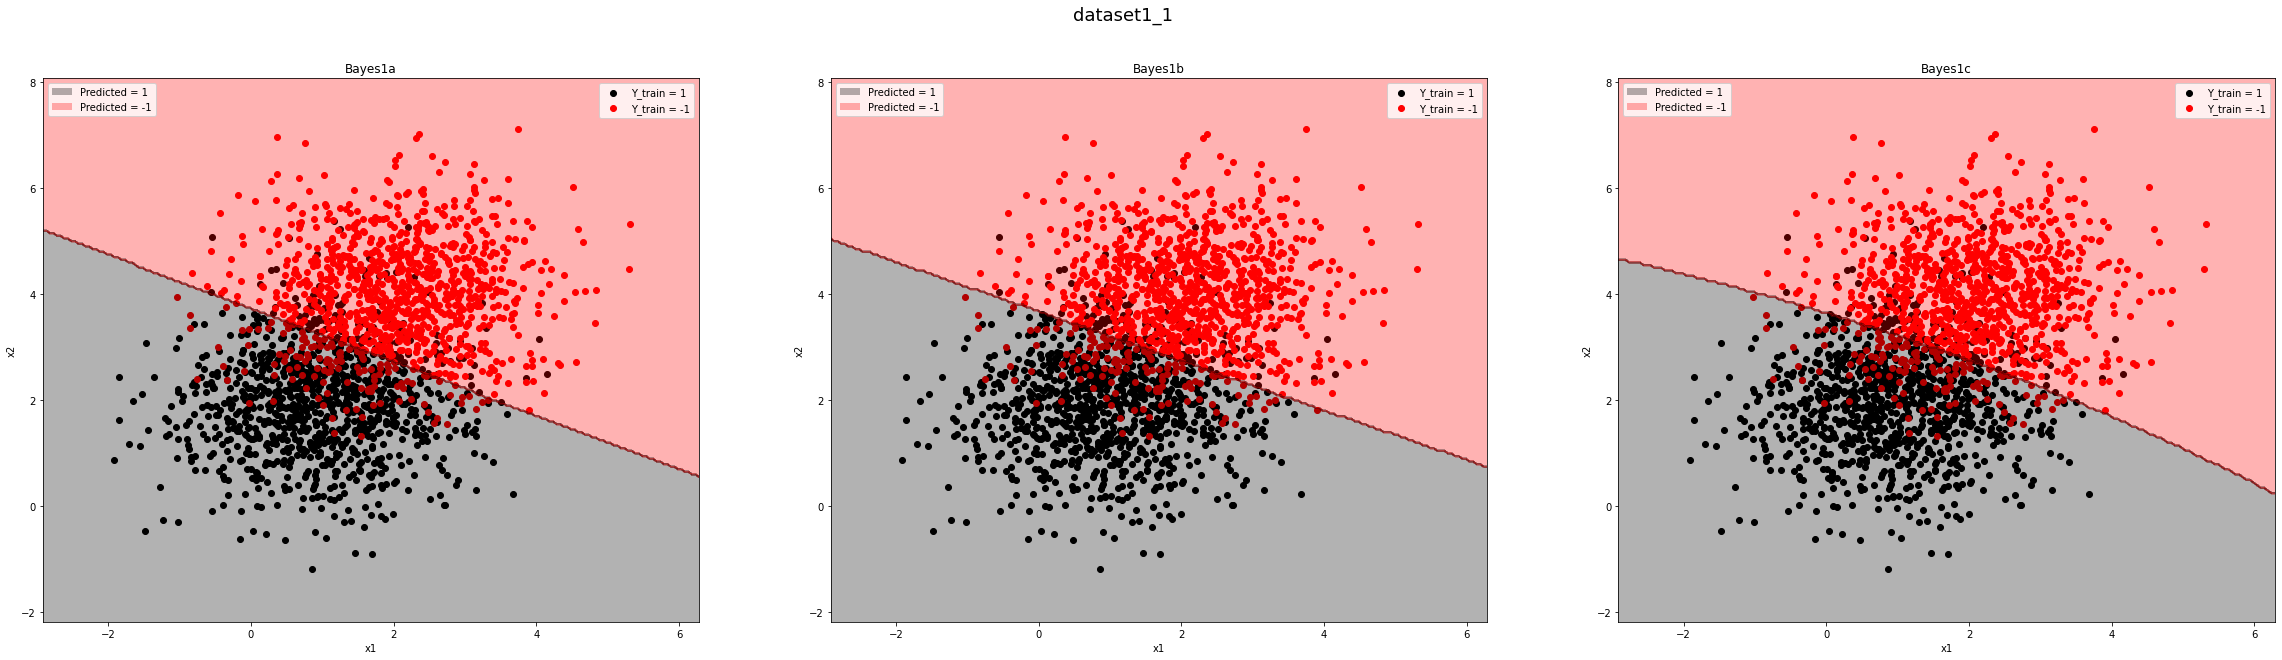

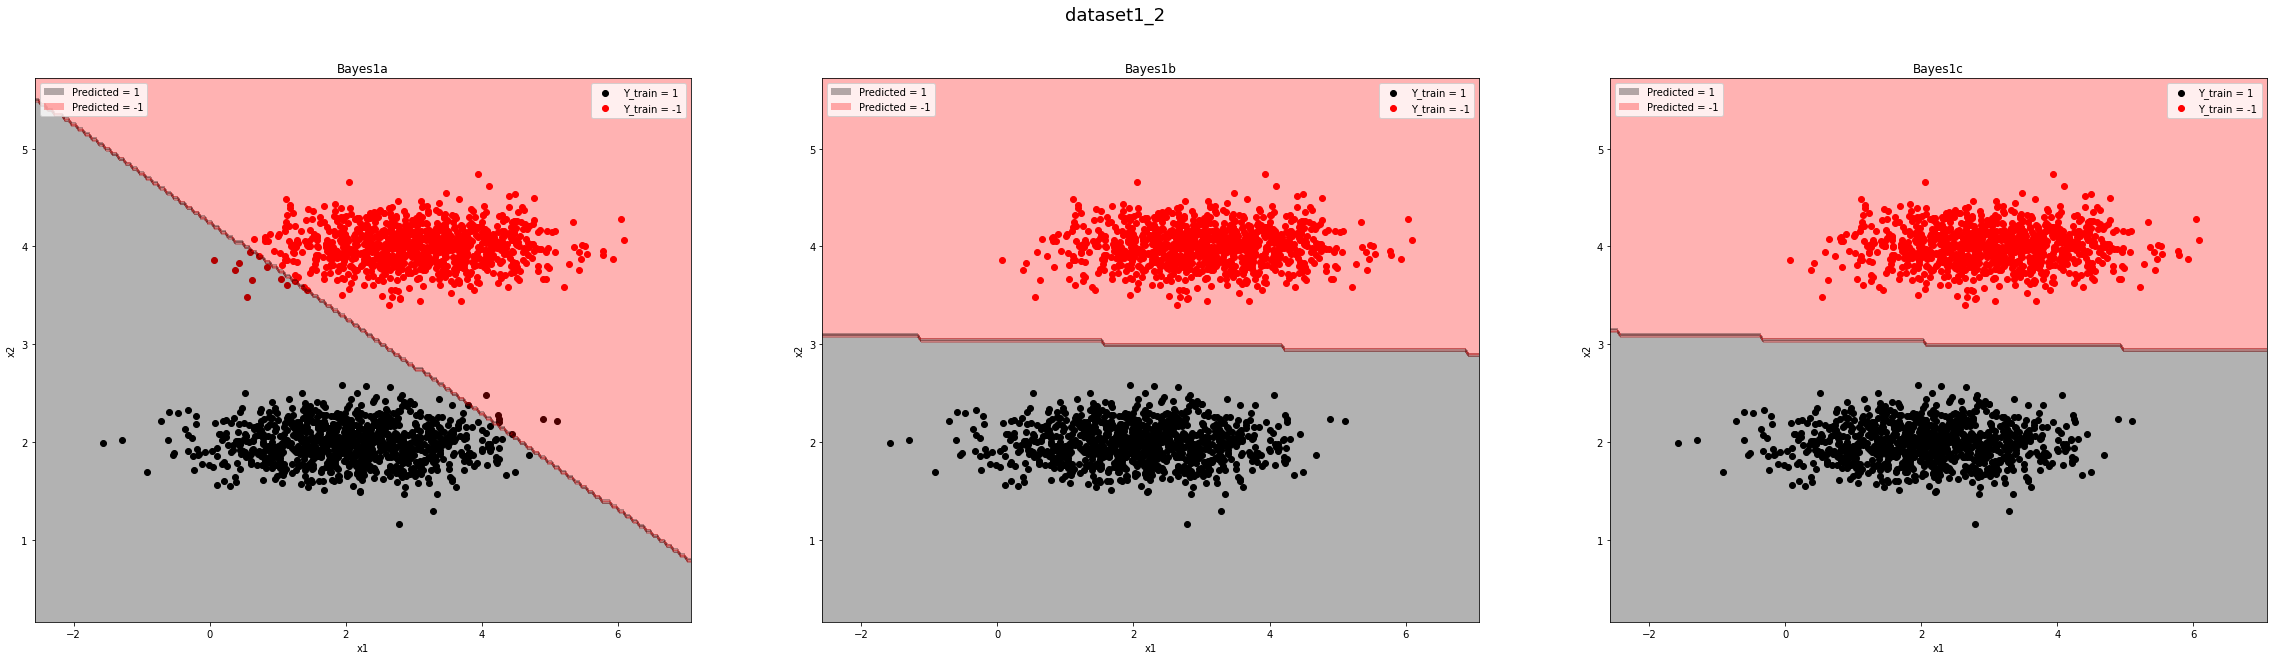

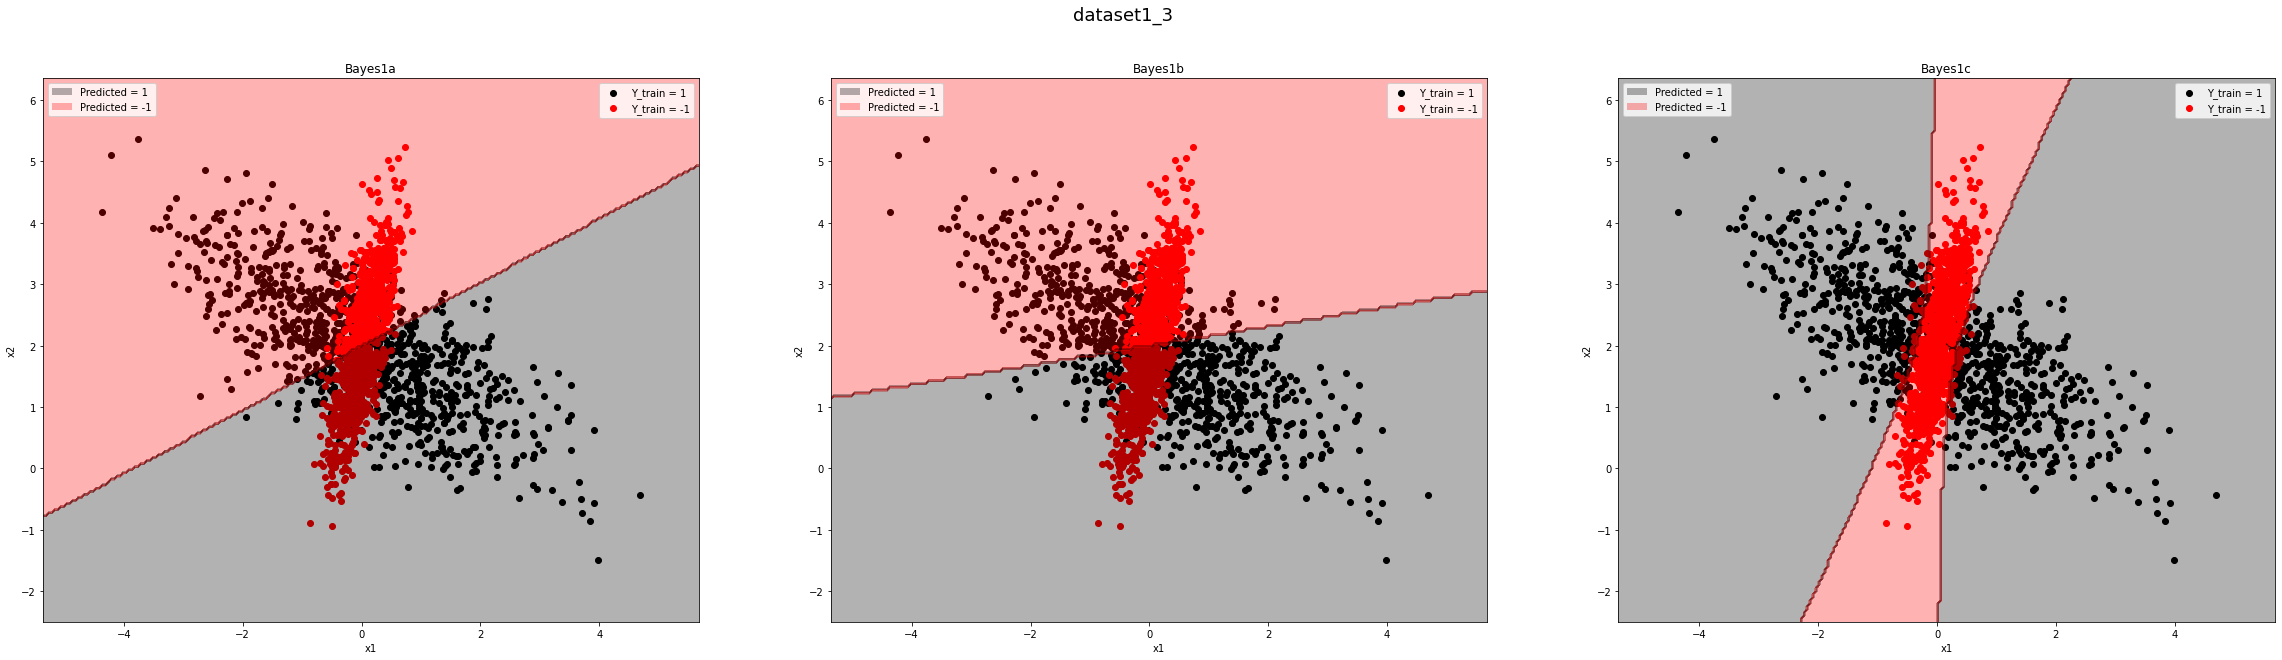

In [ ]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
dataset1 = np.load('../../Data/dataset1_1.npz')
dataset2 = np.load('../../Data/dataset1_2.npz')
dataset3 = np.load('../../Data/dataset1_3.npz')

X_train1 = np.array(dataset1['arr_0'])
Y_train1 = np.array(dataset1['arr_1'])
X_test1 = np.array(dataset1['arr_2'])
Y_test1 = np.array(dataset1['arr_3'])
Y_pred_test_1a = Bayes1a(X_train1, Y_train1, X_test1)
Y_pred_test_1b = Bayes1b(X_train1, Y_train1, X_test1)
Y_pred_test_1c = Bayes1c(X_train1, Y_train1, X_test1)
error_1_1a = Y_test1[Y_pred_test_1a != Y_test1].shape[0] / Y_test1.shape[0]
error_1_1b = Y_test1[Y_pred_test_1b != Y_test1].shape[0] / Y_test1.shape[0]
error_1_1c = Y_test1[Y_pred_test_1c != Y_test1].shape[0] / Y_test1.shape[0]

X_train2 = np.array(dataset2['arr_0'])
Y_train2 = np.array(dataset2['arr_1'])
X_test2 = np.array(dataset2['arr_2'])
Y_test2 = np.array(dataset2['arr_3'])
Y_pred_test_2a = Bayes1a(X_train2, Y_train2, X_test2)
Y_pred_test_2b = Bayes1b(X_train2, Y_train2, X_test2)
Y_pred_test_2c = Bayes1c(X_train2, Y_train2, X_test2)
error_2_1a = Y_test2[Y_pred_test_2a != Y_test2].shape[0] / Y_test2.shape[0]
error_2_1b = Y_test2[Y_pred_test_2b != Y_test2].shape[0] / Y_test2.shape[0]
error_2_1c = Y_test2[Y_pred_test_2c != Y_test2].shape[0] / Y_test2.shape[0]

X_train3 = np.array(dataset3['arr_0'])
Y_train3 = np.array(dataset3['arr_1'])
X_test3 = np.array(dataset3['arr_2'])
Y_test3 = np.array(dataset3['arr_3'])
Y_pred_test_3a = Bayes1a(X_train3, Y_train3, X_test3)
Y_pred_test_3b = Bayes1b(X_train3, Y_train3, X_test3)
Y_pred_test_3c = Bayes1c(X_train3, Y_train3, X_test3)
error_3_1a = Y_test3[Y_pred_test_3a != Y_test3].shape[0] / Y_test3.shape[0]
error_3_1b = Y_test3[Y_pred_test_3b != Y_test3].shape[0] / Y_test3.shape[0]
error_3_1c = Y_test3[Y_pred_test_3c != Y_test3].shape[0] / Y_test3.shape[0]

#print(error_1_1a, error_1_1b, error_1_1c)
#print(error_2_1a, error_2_1b, error_2_1c)
#print(error_3_1a, error_3_1b, error_3_1c)

nds = 3
X_train = {1:X_train1, 2:X_train2, 3:X_train3}
Y_train = {1:Y_train1, 2:Y_train2, 3:Y_train3}
classes = [1, -1]
nc = len(classes)
colors = ['black', 'red']
labels = ['Y_train = ' + str(i) for i in [1, -1]]
leglabel = ["Predicted = " + str(i) for i in classes]
datasetstr = 'dataset1_'
Bayesstr = 'Bayes1'
#change bayes function call
for dataset in range(1,nds+1):
  fig, ax = plt.subplots(1, 3)
  ax = {'a': ax[0], 'b': ax[1], 'c': ax[2]}
  fig.set_size_inches(40, 10, forward=True)
  fig.suptitle(datasetstr + str(dataset), fontsize=18)
  for axis in ax.values():
    X_trainc = [X_train[dataset][Y_train[dataset] == c] for c in classes]
    for i in range(nc):
        axis.scatter(X_trainc[i][:,0], X_trainc[i][:,1], c=colors[i], label=labels[i])
  
  x_min, x_max = X_train[dataset][:, 0].min() - 1, X_train[dataset][:, 0].max() + 1
  y_min, y_max = X_train[dataset][:, 1].min() - 1, X_train[dataset][:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
  X = np.c_[xx.ravel(), yy.ravel()]
  
  Y = {}
  Y['a'] = Bayes1a(X_train[dataset], Y_train[dataset], X).reshape(xx.shape)
  Y['b'] = Bayes1b(X_train[dataset], Y_train[dataset], X).reshape(xx.shape)
  Y['c'] = Bayes1c(X_train[dataset], Y_train[dataset], X).reshape(xx.shape)
  
  for char in ax.keys():
    cs = ax[char].contourf(xx, yy, Y[char], colors=colors[::-1], alpha = 0.3)
    proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in cs.collections]
    clegend = ax[char].legend(proxy[::-1], leglabel, loc="upper left")

    ax[char].set_title(Bayesstr + char)
    ax[char].set_xlabel('x1')
    ax[char].set_ylabel('x2')
    ax[char].legend()
    ax[char].add_artist(clegend)


** Cell type : TextWrite ** 
(Write your observations and table of errors here)

---------

### Bayes1a:
#### Assumptions:
* $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$
* $X|Y=1 \sim \mathcal{N}(\mu_+, I)$

#### Parameters:
* $a = P(Y = 1)$
* $\mu_+$
* $\mu_-$

#### Decision boundary:
$w^Tx+b=c $  where 

* $w=\mu_--\mu_+$


* $b=\dfrac{||\mu_+||^2-||\mu_-||^2}{2}$


* $c=ln\left(\dfrac{a}{1-a}\right)$.

#### Observations:
* As we can see from the decision boundary equation it is trying to find a linear seperator for the data.
* For dataset_1, the data is not linearly seperable and hence we get an error of 0.126. The data overlap is not too high and also the data suggests that the conditional distributions have identity covariance and hence we get a decent error.
* For dataset_2, the data is linearly seperable but we can see that the datapoints of each class is elliptical. But we have assumed that $X|Y=-1, X|Y=1$ are normal distributions with covariance as identity which means that the datapoints of each class should have been circular. Since this assumption is wrong we get an error rate of 0.0085.
* For dataset_3, the data is highly overlapping and also our assumptions are wrong as the data of each class is elliptical and the axes are rotated. Hence we get a high error of 0.497.

-------

### Bayes1b:
#### Assumptions:
* $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$
* $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$

#### Parameters:
* $a = P(Y = 1)$
* $\mu_+$
* $\mu_-$
* $\Sigma$


#### Decision boundary:
$w^Tx+b=c$ where 

* $w= \Sigma^{-1}(\mu_--\mu_+)$


* $b=\dfrac{\mu_+^T \Sigma^{-1}\mu_+-\mu_-^T\Sigma^{-1}\mu_-}{2}$


* $c=ln(\dfrac{a}{1-a})$.

#### Observations:
* As we can see from the decision boundary equation it is still trying to find a linear seperator for the data.
* For dataset_1, the assumptions seem to hold, the data suggests a common covariance. But there is overlap in the data, hence a linear seperator will have some error which is 0.1245 which is not really an improvement from Bayes_1a. This is because the assumptions were satisfied in both cases but the real problem is the overlap.
* For dataset_2, the data suggests that the conditional distributions have same covariance as we can see that their axes are parallel to each other and also theyre both elliptical with similar spread. Since assumptions are valid and the data is not overlapping we achieve a error of 0.
* For dataset_3, the data suggests that the coditional distributions have different covariance as the axes are not parallel and the spread is also differing. Hence since the assumptions are wrong and the data is overlapping, we get a high error of 0.495.

-------

### Bayes1c:
#### Assumptions:
* $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$
* $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$

#### Parameters:
* $a = P(Y = 1)$
* $\mu_+$
* $\mu_-$
* $\Sigma_+$
* $\Sigma_-$


#### Observations:
* It is no longer trying to find just a linear seperator for the data. This has the least restrictive assumptions of the three.
* For dataset_1 the assumptions still hold as they were anyway holding in the previous cases itself. But the data is overlapping and hence we get a similar error of 0.1245.
* For dataset_2 the assumptions still hold as they were anyway holding in the previous case itself and also the data is linearly seperable. Hence we get an error of 0.0.
* For dataset_3 the data suggests that the conditional distributions have different covariance matrices as explained berfore. Hence our assumption holds and since there is overlap in data we get an error of 0.135 which is much better than the previous two.


-----
The error rates of the 3 classifiers obtained on the 3 datasets are depicted below:

Test Error Rate|Bayes1a|Bayes1b|Bayes1c|
:--------------|------:|------:|------:|
**dataset1_1** |  0.126| 0.1245|0.1245 |
**dataset1_2** | 0.0085|    0.0|0.0    |
**dataset1_3** |  0.497|  0.495|0.135  |


-----


** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [ ]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    L = np.asarray([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])
    n = Y_train.shape[0]
    d = X_train.shape[1]
    m = X_test.shape[0]
    Y = [Y_train[Y_train == i] for i in range(1, 5)]
    a = [Y[i].shape[0] / n for i in range(4)]
    X = [X_train[Y_train == i] for i in range(1, 5)]
    Mu = [np.sum(X[i], axis=0) / X[i].shape[0] for i in range(4)]
    #eta = np.asarray([[a[i] * np.exp( (-0.5) * (np.linalg.norm(X_test[j, :] - Mu[i])**2)) for i in range(4)] for j in range(m)])
    W = [Mu[i] for i in range(4)]
    b = [np.asarray((-0.5) * np.matmul(Mu[i], W[i])) for i in range(4)]
    eta = np.asarray([np.exp(np.matmul(X_test, Mu[i]) + b[i]) * a[i] for i in range(4)])
    eta = np.transpose(eta)
    Y_tes_pred = np.matmul(eta, L)
    Y_test_pred = np.zeros(m,)
    for i in range(m):
        Y_test_pred[i] = np.argmin(Y_tes_pred[i]) + 1
    return Y_test_pred
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    L = np.asarray([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])
    n = Y_train.shape[0]
    d = X_train.shape[1]
    m = X_test.shape[0]
    Y = [Y_train[Y_train == i] for i in range(1, 5)]
    a = [Y[i].shape[0] / n for i in range(4)]
    X = [X_train[Y_train == i] for i in range(1, 5)]
    Mu = [np.sum(X[i], axis=0) / X[i].shape[0] for i in range(4)]
    XM = [np.transpose(np.asarray([X_train[i, :] - Mu[j] for i in range(n) if Y_train[i] == j + 1])) for j in range(4)]
    Sigma = 0
    for j in range(4):
        Sigma = Sigma + np.matmul(XM[j], np.transpose(XM[j]))
    Sigma = Sigma / n
    Sigmainv = np.linalg.inv(Sigma)
    #eta = np.asarray([[a[i] * (np.exp((-0.5) * (X_test[j] - Mu[i]).T @ Sigmainv @ (X_test[j] - Mu[i]) )) for i in range(4)] for j in range(m)])
    W = [np.matmul(Sigmainv, Mu[i]) for i in range(4)]
    b = [np.asarray((-0.5) * np.matmul(Mu[i], W[i])) for i in range(4)]
    eta = np.asarray([np.exp(np.matmul(X_test, W[i]) + b[i]) * a[i] for i in range(4)])
    eta = np.transpose(eta)
    Y_tes_pred = np.matmul(eta, L)
    Y_test_pred = np.zeros(m)
    for i in range(m):
        Y_test_pred[i] = np.argmin(Y_tes_pred[i]) + 1
    return Y_test_pred

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    L = np.asarray([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])
    n = Y_train.shape[0]
    d = X_train.shape[1]
    m = X_test.shape[0]
    Y = [Y_train[Y_train == i] for i in range(1, 5)]
    a = [Y[i].shape[0] / n for i in range(4)]
    X = [X_train[Y_train == i] for i in range(1, 5)]
    Mu = [np.sum(X[i], axis=0) / X[i].shape[0] for i in range(4)]
    XM = [np.transpose(np.asarray([X_train[i, :] - Mu[j] for i in range(n) if Y_train[i] == j + 1])) for j in range(4)]
    Sigma = [np.matmul(XM[i], np.transpose(XM[i])) for i in range(4)] 
    Sigma = [Sigma[i] / Y[i].shape[0] for i in range(4)]
    Sigmainv = [np.linalg.inv(Sigma[i]) for i in range(4)]
    W = [np.exp([(-0.5) * (X_test[i, :] - Mu[j]).T @ Sigmainv[j] @ (X_test[i, :] - Mu[j]) for i in range(m)]) for j in range(4)]
    b = [np.asarray([a[i] * (np.linalg.det(Sigma[i]))**(-0.5) for j in range(m)]) for i in range(4)]
    eta = np.asarray([W[i] * b[i] for i in range(4)])
    eta = np.transpose(eta)
    Y_tes_pred = np.matmul(eta, L)
    Y_test_pred = np.zeros(m)
    for i in range(m):
        Y_test_pred[i] = np.argmin(Y_tes_pred[i]) + 1
    return Y_test_pred


In [ ]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


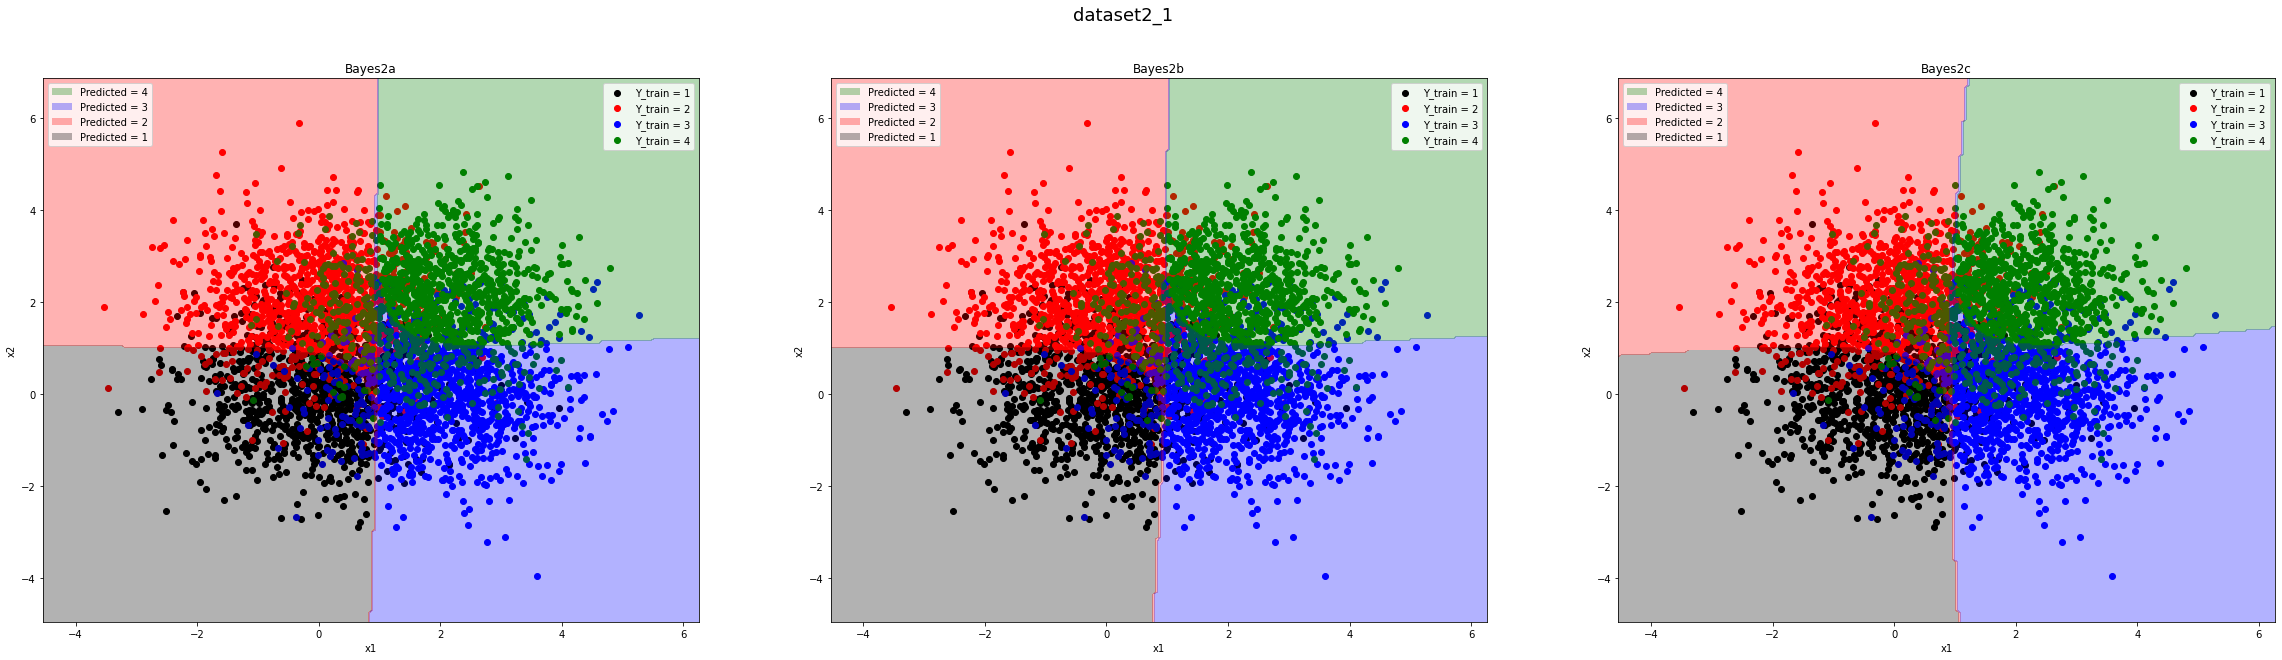

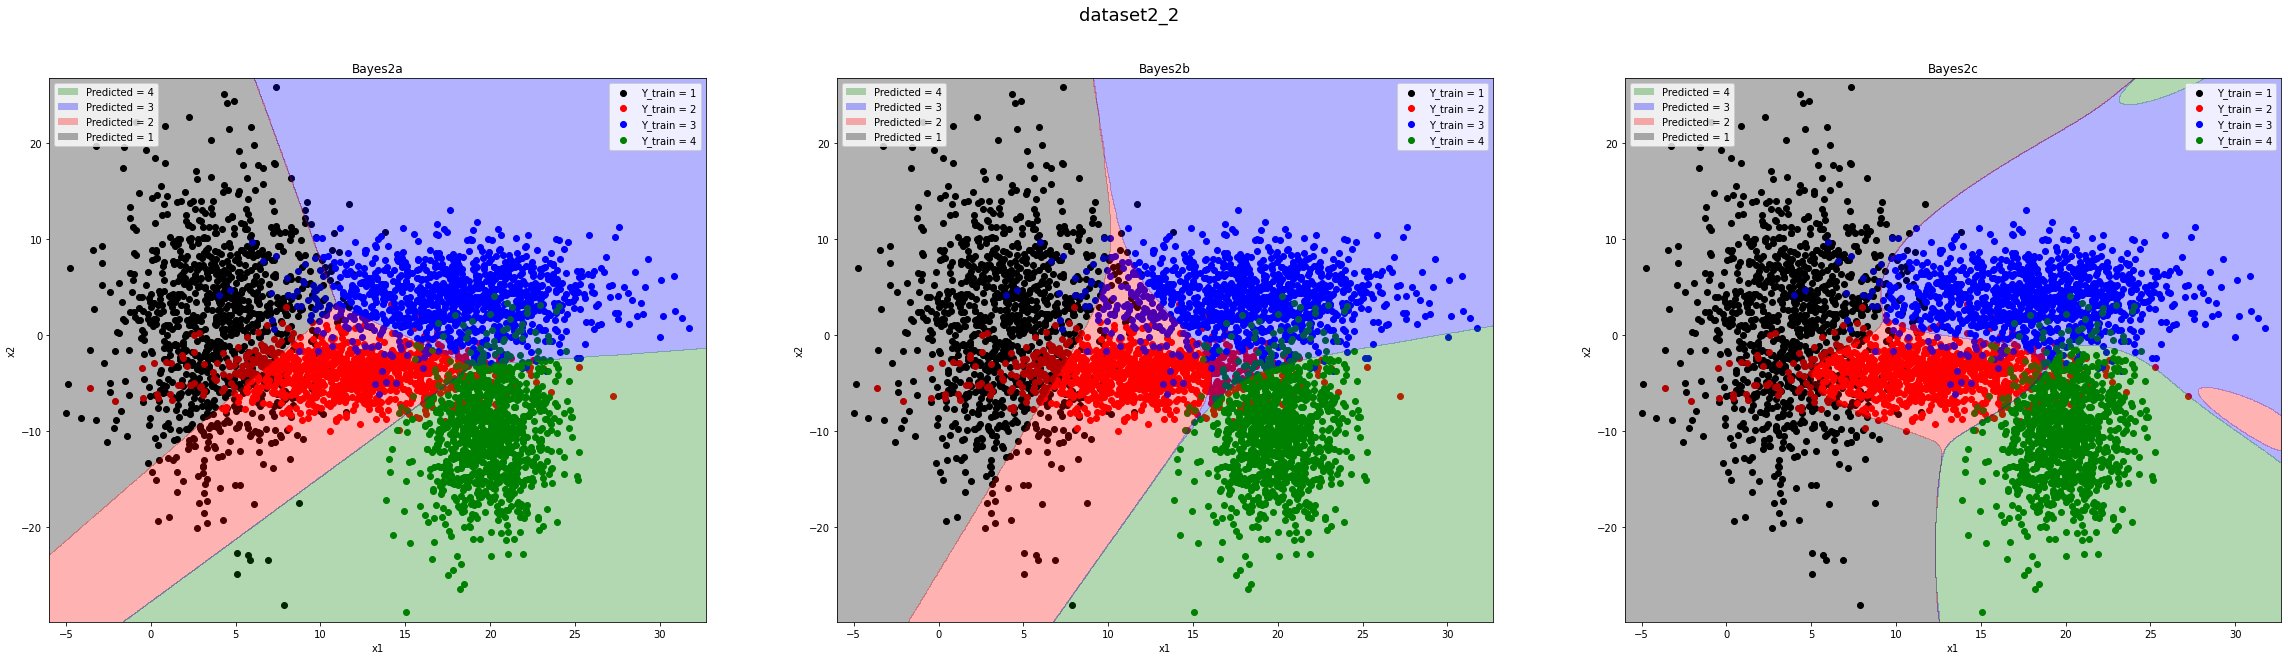

In [ ]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
L = [[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]]

dataset1 = np.load('../../Data/dataset2_1.npz')
dataset2 = np.load('../../Data/dataset2_2.npz')

X_train1 = np.array(dataset1['arr_0'])
Y_train1 = np.array(dataset1['arr_1'])
X_test1 = np.array(dataset1['arr_2'])
Y_test1 = np.array(dataset1['arr_3'])
Y_pred_test_1a = Bayes2a(X_train1, Y_train1, X_test1)
Y_pred_test_1b = Bayes2b(X_train1, Y_train1, X_test1)
Y_pred_test_1c = Bayes2c(X_train1, Y_train1, X_test1)
error_1_2a = np.sum(np.array([L[int(Y_pred_test_1a[i])-1][int(Y_test1[i])-1] for i in range(Y_test1.shape[0])])) / Y_test1.shape[0]
error_1_2b = np.sum(np.array([L[int(Y_pred_test_1b[i])-1][int(Y_test1[i])-1] for i in range(Y_test1.shape[0])])) / Y_test1.shape[0]
error_1_2c = np.sum(np.array([L[int(Y_pred_test_1c[i])-1][int(Y_test1[i])-1] for i in range(Y_test1.shape[0])])) / Y_test1.shape[0]

X_train2 = np.array(dataset2['arr_0'])
Y_train2 = np.array(dataset2['arr_1'])
X_test2 = np.array(dataset2['arr_2'])
Y_test2 = np.array(dataset2['arr_3'])
Y_pred_test_2a = Bayes2a(X_train2, Y_train2, X_test2)
Y_pred_test_2b = Bayes2b(X_train2, Y_train2, X_test2)
Y_pred_test_2c = Bayes2c(X_train2, Y_train2, X_test2)
error_2_2a = np.sum(np.array([L[int(Y_pred_test_2a[i])-1][int(Y_test2[i])-1] for i in range(Y_test2.shape[0])])) / Y_test2.shape[0]
error_2_2b = np.sum(np.array([L[int(Y_pred_test_2b[i])-1][int(Y_test2[i])-1]for i in range(Y_test2.shape[0])])) / Y_test2.shape[0]
error_2_2c = np.sum(np.array([L[int(Y_pred_test_2c[i])-1][int(Y_test2[i])-1] for i in range(Y_test2.shape[0])])) / Y_test2.shape[0]

#print(error_1_2a, error_1_2b, error_1_2c)
#print(error_2_2a, error_2_2b, error_2_2c)

nds = 2
X_train = {1:X_train1, 2:X_train2}
Y_train = {1:Y_train1, 2:Y_train2}
classes = range(1, 5)
nc = len(classes)
colors = ['black', 'red', 'blue', 'green']
labels = ['Y_train = ' + str(i) for i in classes]
leglabel = ["Predicted = " + str(i) for i in classes]
datasetstr = 'dataset2_'
Bayesstr = 'Bayes2'
#change bayes function call
for dataset in range(1,nds+1):
  fig, ax = plt.subplots(1, 3)
  ax = {'a': ax[0], 'b': ax[1], 'c': ax[2]}
  fig.set_size_inches(40, 10, forward=True)
  fig.suptitle(datasetstr + str(dataset), fontsize=18)
  for axis in ax.values():
    X_trainc = [X_train[dataset][Y_train[dataset] == c] for c in classes]
    for i in range(nc):
        axis.scatter(X_trainc[i][:,0], X_trainc[i][:,1], c=colors[i], label=labels[i])
  
  x_min, x_max = X_train[dataset][:, 0].min() - 1, X_train[dataset][:, 0].max() + 1
  y_min, y_max = X_train[dataset][:, 1].min() - 1, X_train[dataset][:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
  X = np.c_[xx.ravel(), yy.ravel()]
  
  Y = {}
  Y['a'] = Bayes2a(X_train[dataset], Y_train[dataset], X).reshape(xx.shape)
  Y['b'] = Bayes2b(X_train[dataset], Y_train[dataset], X).reshape(xx.shape)
  Y['c'] = Bayes2c(X_train[dataset], Y_train[dataset], X).reshape(xx.shape)
  
  for char in ax.keys():
    cs = ax[char].contourf(xx, yy, Y[char], levels = [0, 1, 2, 3, 4], colors=colors, alpha = 0.3)
    proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in cs.collections]
    clegend = ax[char].legend(proxy[::-1], leglabel[::-1], loc="upper left")

    ax[char].set_title(Bayesstr + char)
    ax[char].set_xlabel('x1')
    ax[char].set_ylabel('x2')
    ax[char].legend()
    ax[char].add_artist(clegend)

** Cell type : TextWrite ** 
(Write your observations and table of errors here)

------------
### Bayes2a:
#### Assumptions:
* $X|Y=1 \sim \mathcal{N}(\mu_1, I)$
* $X|Y=2 \sim \mathcal{N}(\mu_2, I)$
* $X|Y=3 \sim \mathcal{N}(\mu_3, I)$
* $X|Y=4 \sim \mathcal{N}(\mu_4, I)$

#### Parameters:
* $a_1, a_2, a_3, a_4$ where $a_i = P(Y = i)$
* $\mu_1, \mu_2, \mu_3, \mu_4$

#### Observations:
* For datset_1, the data suggests that the conditional distributions have a covariance of identity but due to the high overlap (Bayes' error) we get an error of 0.42975.
* For dataset_2, the data suggests that the conditional distributions have non identity covariances as they are elliptical. Due to this wrong assumption and overlap we get an error of 0.1835.

--------------
### Bayes2b:
#### Assumptions:
* $X|Y=1 \sim \mathcal{N}(\mu_1, \Sigma)$
* $X|Y=2 \sim \mathcal{N}(\mu_2, \Sigma)$
* $X|Y=3 \sim \mathcal{N}(\mu_3, \Sigma)$
* $X|Y=4 \sim \mathcal{N}(\mu_4, \Sigma)$

#### Parameters:
* $a_1, a_2, a_3, a_4$ where $a_i = P(Y = i)$
* $\mu_1, \mu_2, \mu_3, \mu_4$
* $\Sigma$

#### Observations:
* For datset_1, the assumptions are anyway satisfied as it was already satisfied in the previous case but due to the high overlap (Bayes' error) we get an error of 0.429.
* For dataset_2, the data suggests that the conditional distributions have different covariances as the axes are along different directions. Due to this wrong assumption and overlap we get an error of 0.1895.

--------------
### Bayes2c:
#### Assumptions:
* $X|Y=1 \sim \mathcal{N}(\mu_1, \Sigma_1)$
* $X|Y=2 \sim \mathcal{N}(\mu_2, \Sigma_2)$
* $X|Y=3 \sim \mathcal{N}(\mu_3, \Sigma_3)$
* $X|Y=4 \sim \mathcal{N}(\mu_4, \Sigma_4)$

#### Parameters:
* $a_1, a_2, a_3, a_4$ where $a_i = P(Y = i)$
* $\mu_1, \mu_2, \mu_3, \mu_4$
* $\Sigma_1, \Sigma_2, \Sigma_3, \Sigma_4$

#### Observations:
* For datset_1, the assumptions are anyway satisfied as it was already satisfied in the previous case but due to the high overlap (Bayes' error) we get an error of 0.42775.
* For dataset_2, the assumptions are met as explained before. But due to overlap we get an error of 0.14075. We can see that this is better than the other two errors.

------
Expected losses for the 3 classifiers on the two datasets are tabulated below:

Expected Loss|Bayes2a|Bayes2b|Bayes2c
-|-:|-:|-:
**dataset2_1**|0.42975|0.429|0.42775
**dataset2_2**|0.1835|0.1895|0.14075

--------
#### Confusion matrices
##### dataset2_1
Bayes2a|Predicted Class 1|Predicted Class 2|Predicted Class 3|Predicted Class 4
-|-:|-:|-:|-:
**Truth Class 1**|633|219|136|12
**Truth Class 2**|97|738|62|103
**Truth Class 3**|86|49| 770|  95
**Truth Class 4**|15|136 |194| 655


Bayes2b|Predicted Class 1|Predicted Class 2|Predicted Class 3|Predicted Class 4
-|-:|-:|-:|-:
**Truth Class 1**|633|218|137|12
**Truth Class 2**|95|743|60|102
**Truth Class 3**|84|49| 773|  94
**Truth Class 4**|16|137 |196| 651


Bayes2c|Predicted Class 1|Predicted Class 2|Predicted Class 3|Predicted Class 4
-|-:|-:|-:|-:
**Truth Class 1**|634|217|138|11
**Truth Class 2**|99|742|61|98
**Truth Class 3**|87|47| 772|  94
**Truth Class 4**|15|134 |201| 650

##### dataset2_2


Bayes2a|Predicted Class 1|Predicted Class 2|Predicted Class 3|Predicted Class 4
-|-:|-:|-:|-:
**Truth Class 1**|830|150|18|2
**Truth Class 2**|93|784|46|77
**Truth Class 3**|30|61| 905|  4
**Truth Class 4**|0|23 |78| 899

Bayes2b|Predicted Class 1|Predicted Class 2|Predicted Class 3|Predicted Class 4
-|-:|-:|-:|-:
**Truth Class 1**|891|106|3|0
**Truth Class 2**|119|691|124|66
**Truth Class 3**|23|106| 864|  7
**Truth Class 4**|0|5 |102| 893


Bayes2c|Predicted Class 1|Predicted Class 2|Predicted Class 3|Predicted Class 4
-|-:|-:|-:|-:
**Truth Class 1**|901|80|19|0
**Truth Class 2**|64|824|46|66
**Truth Class 3**|19|31| 936| 14
**Truth Class 4**|0|36 |48| 916

-----

**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




<ipython-input-8-6f2df29c0ff1>:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(30,6))


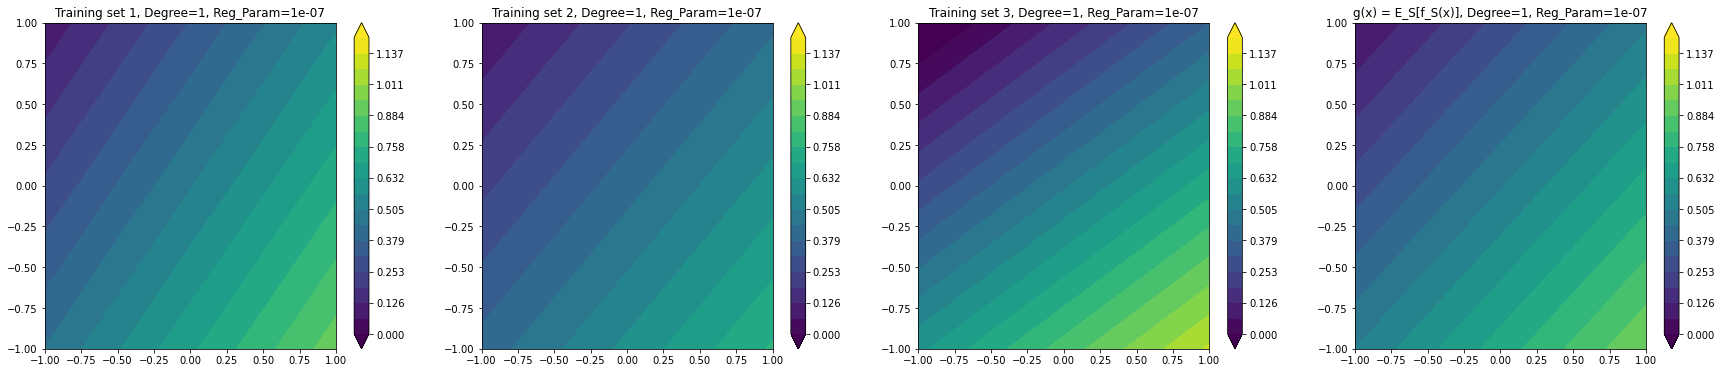

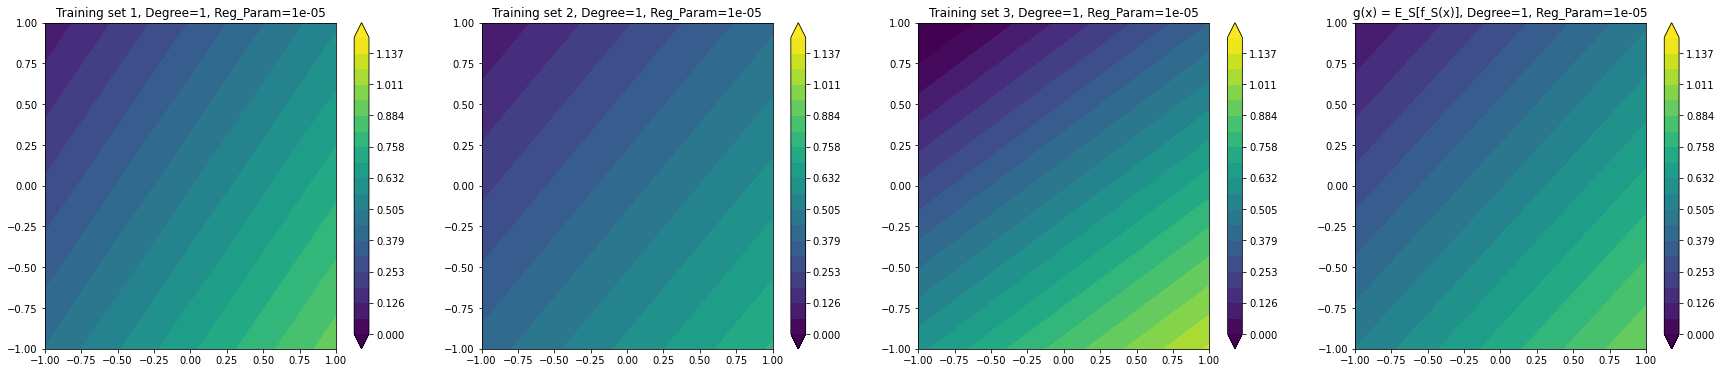

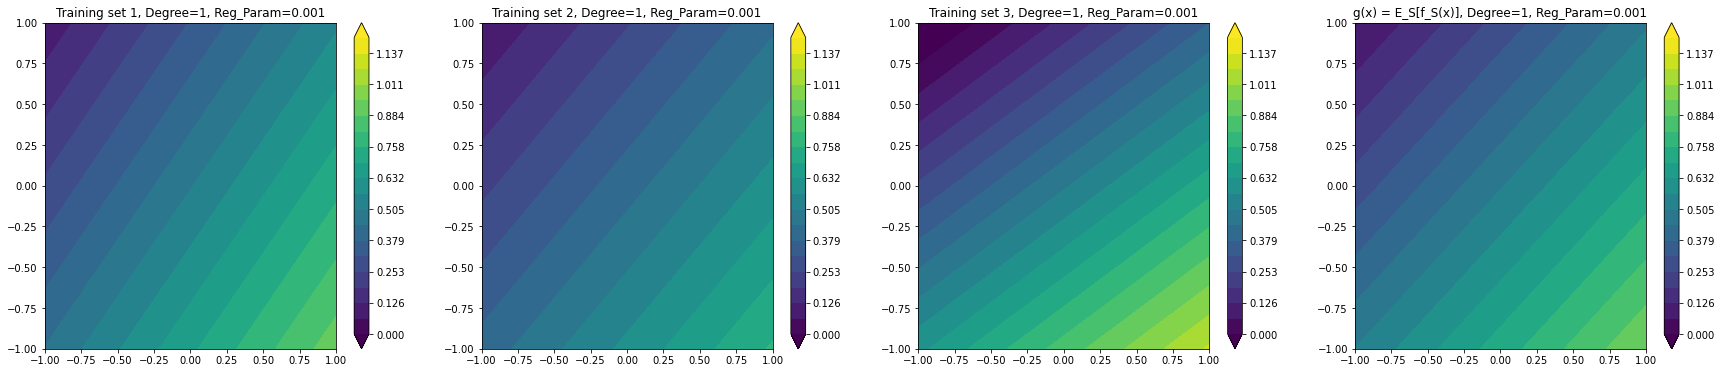

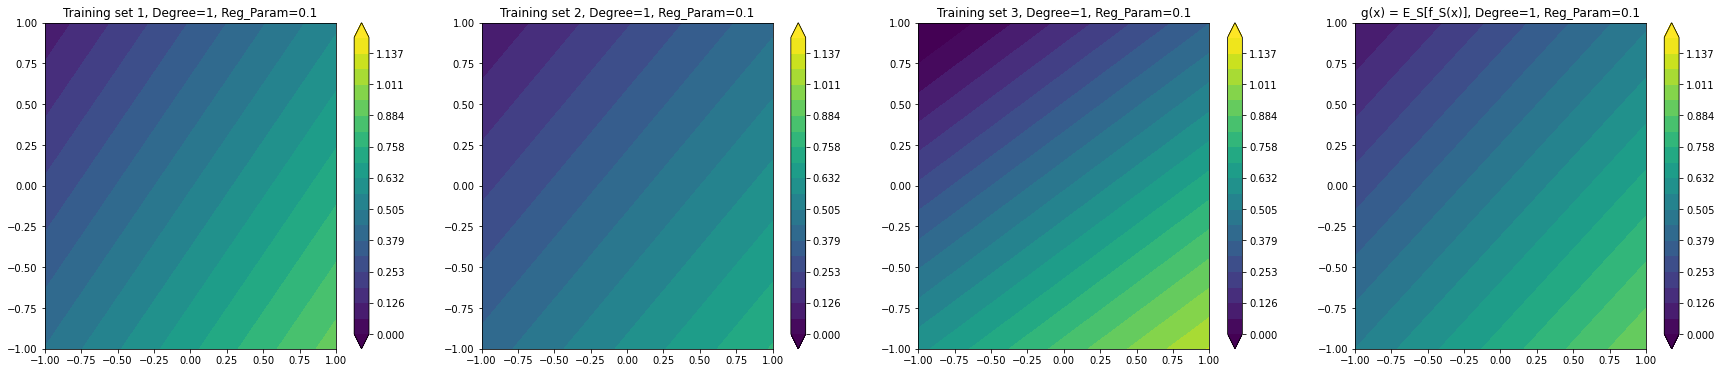

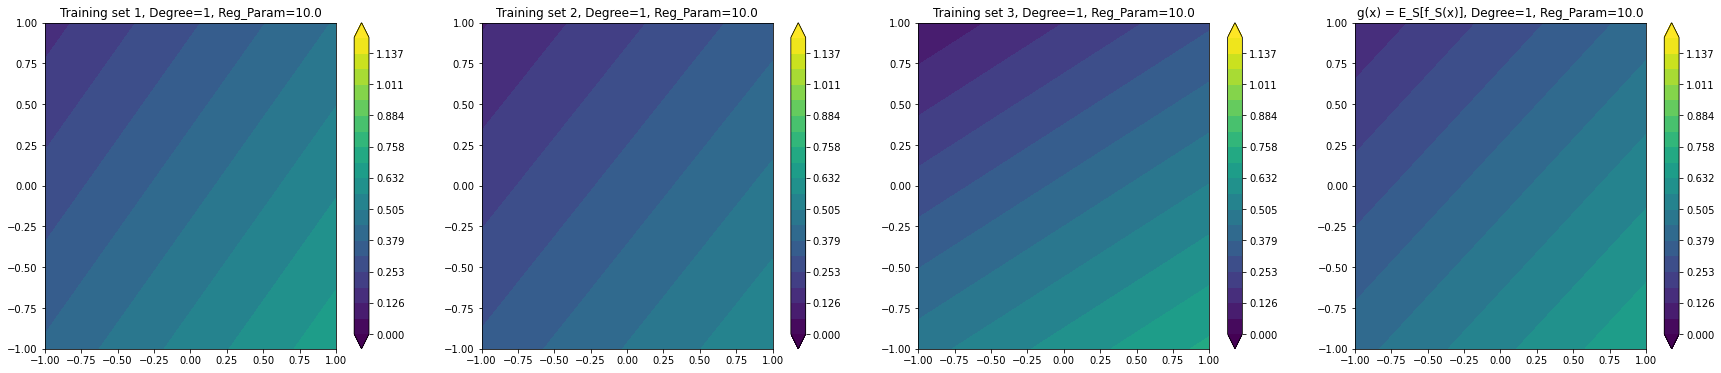

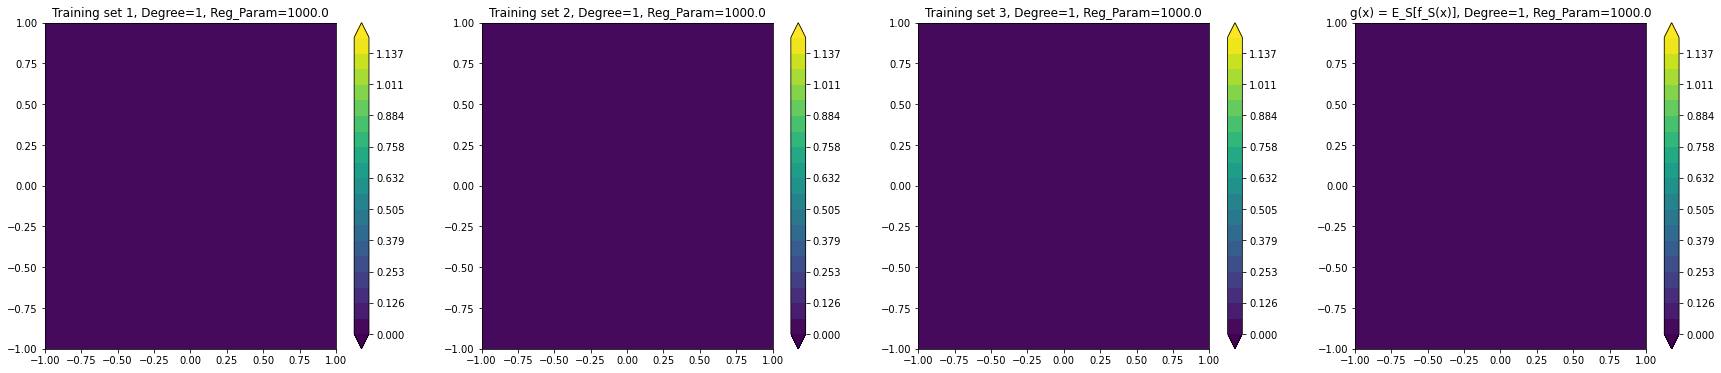

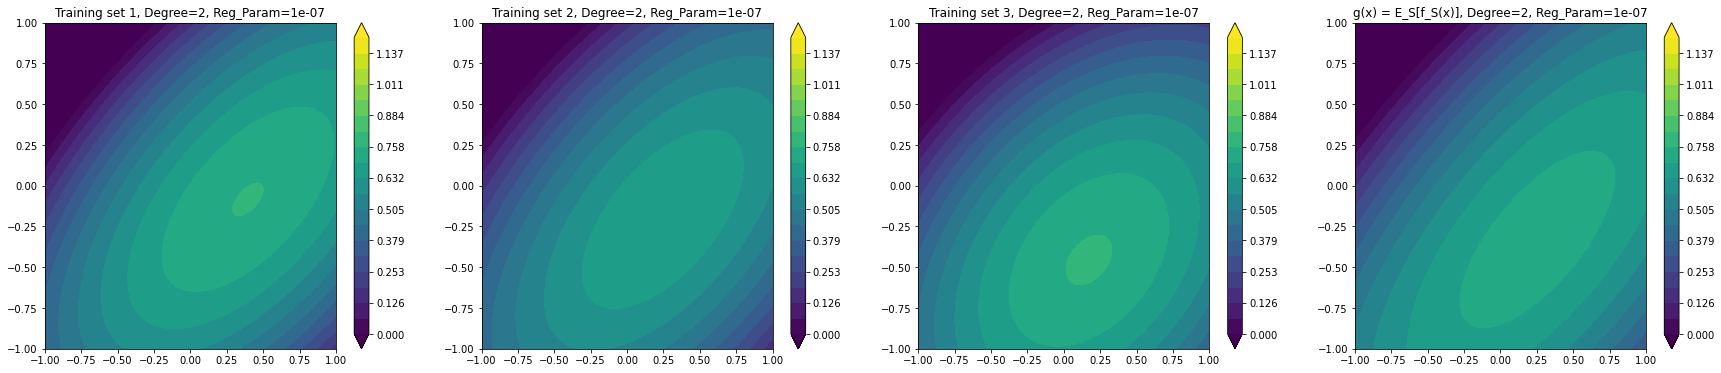

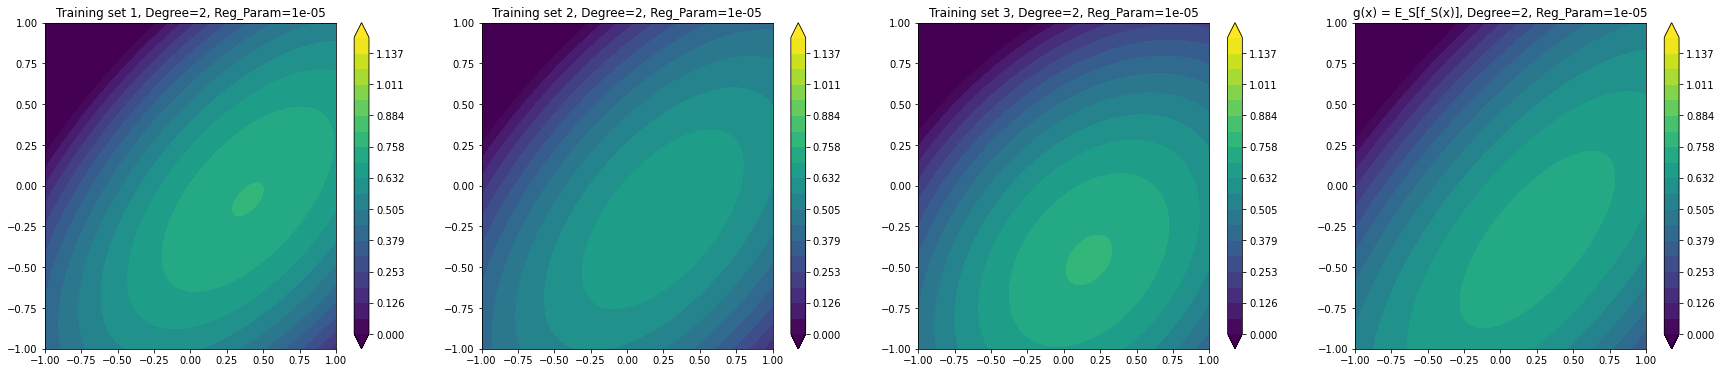

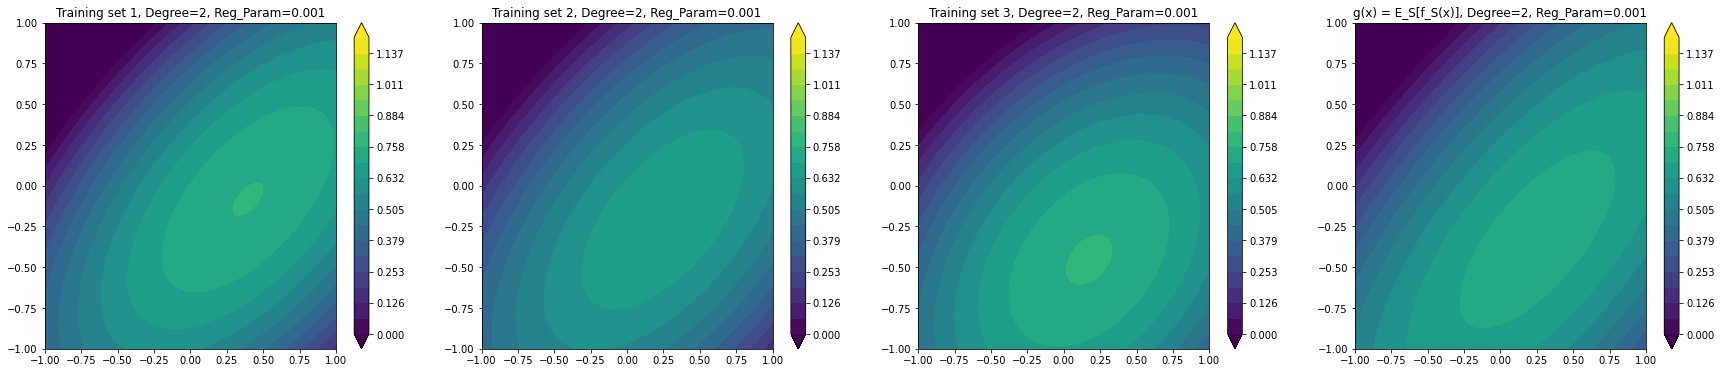

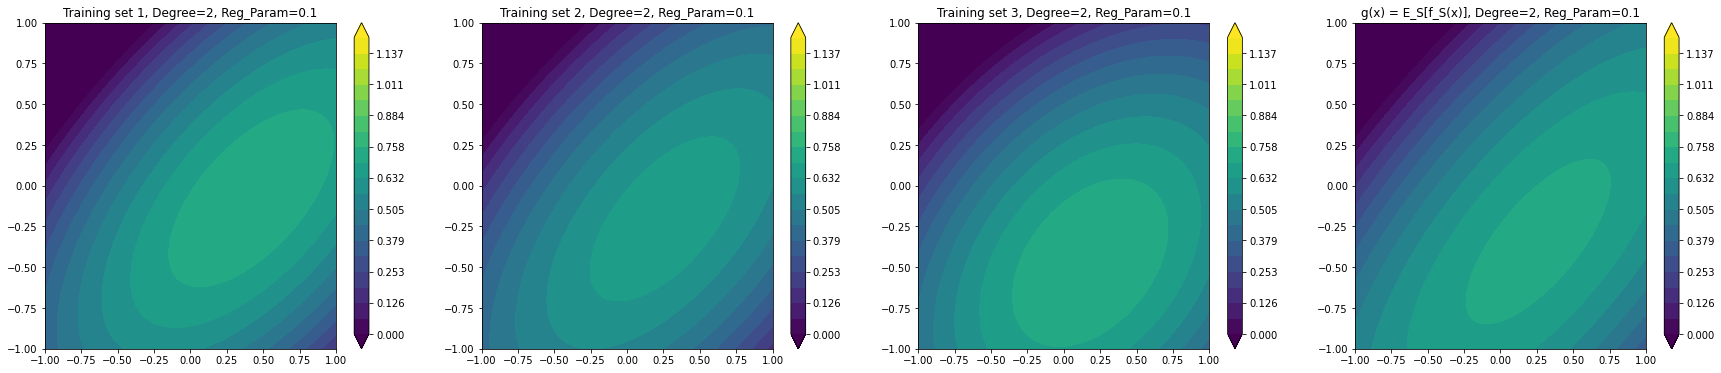

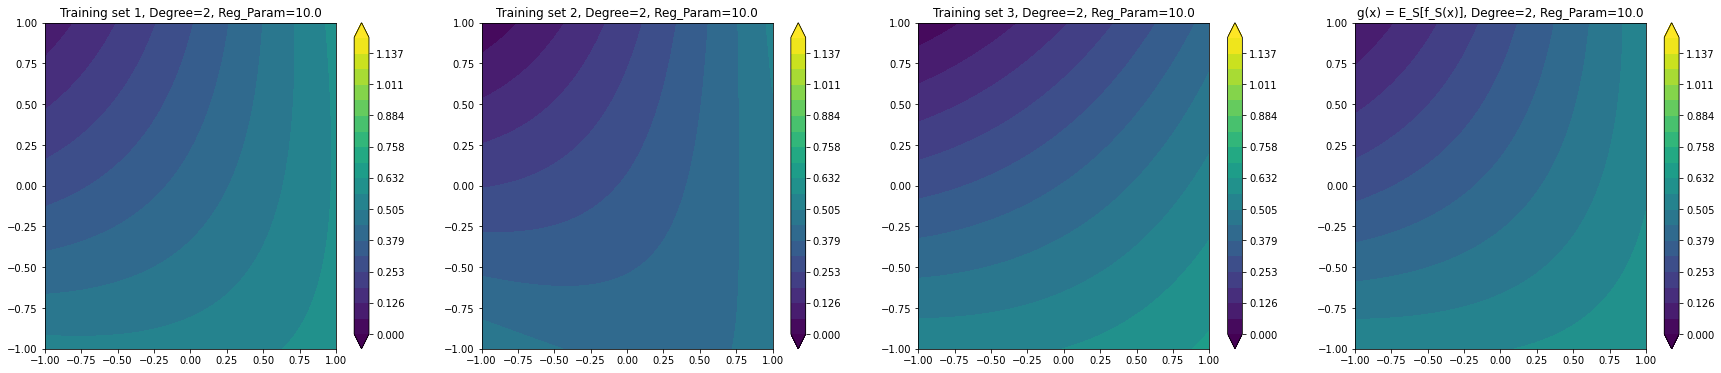

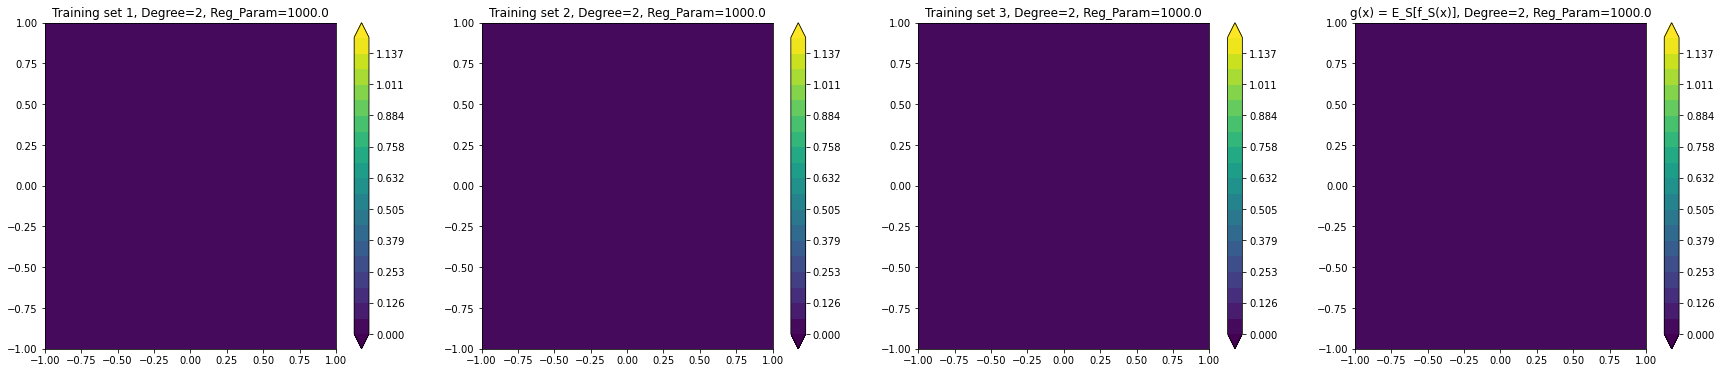

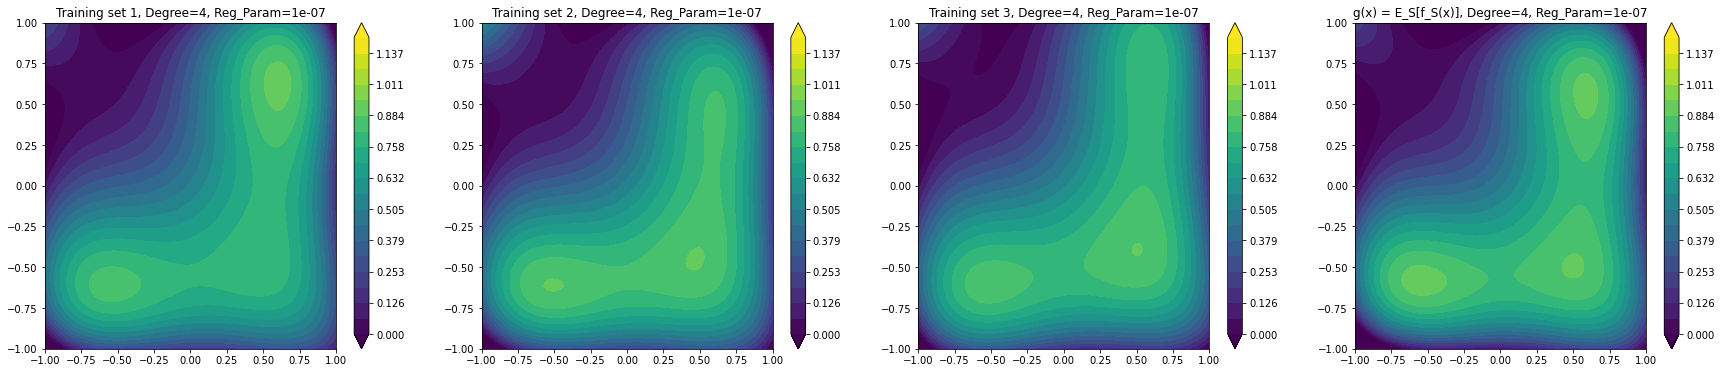

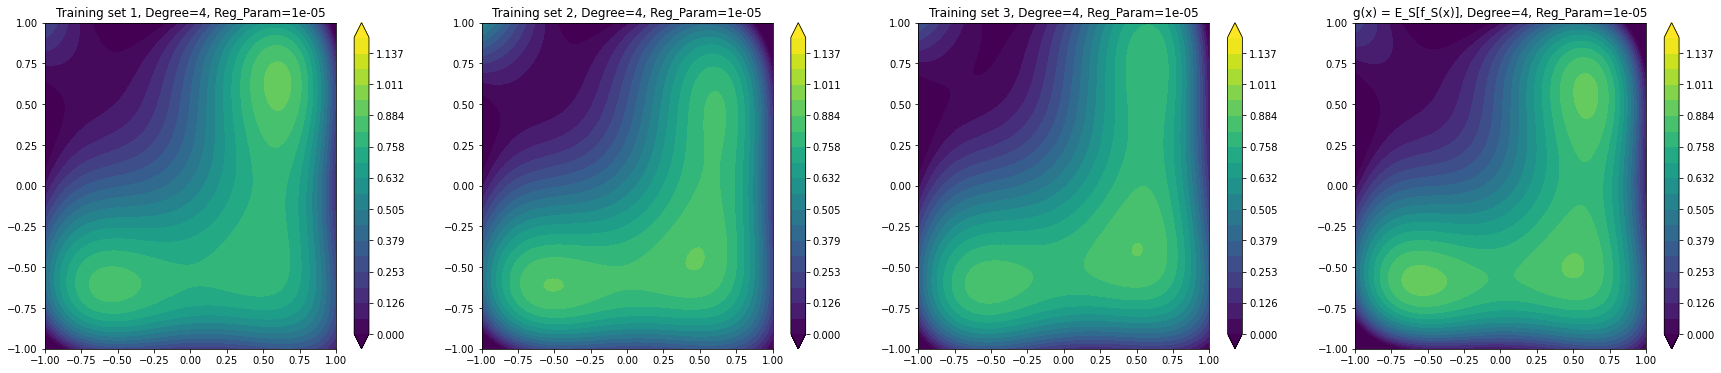

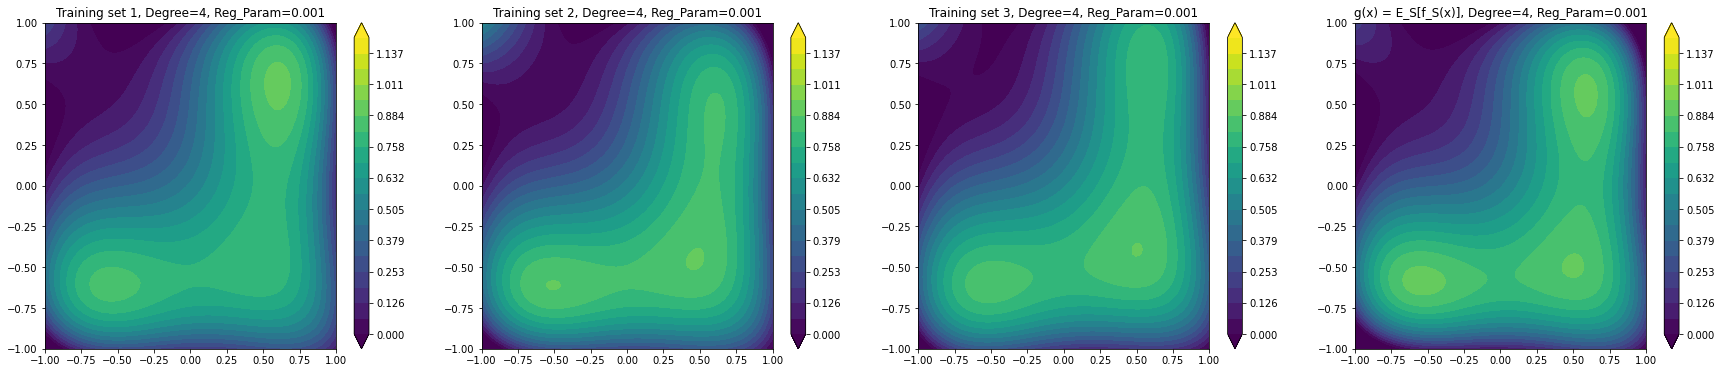

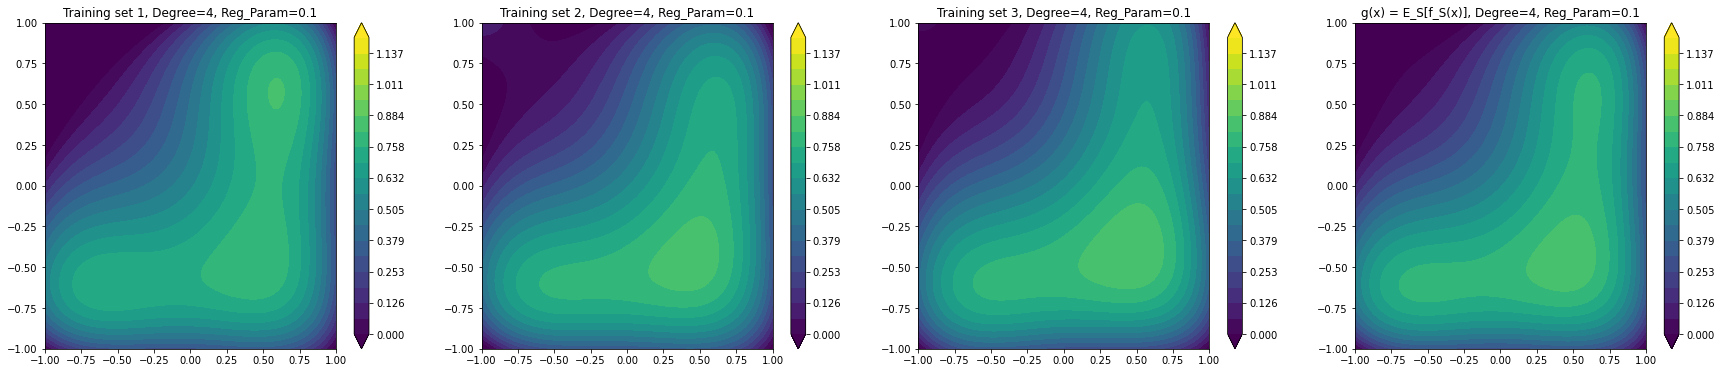

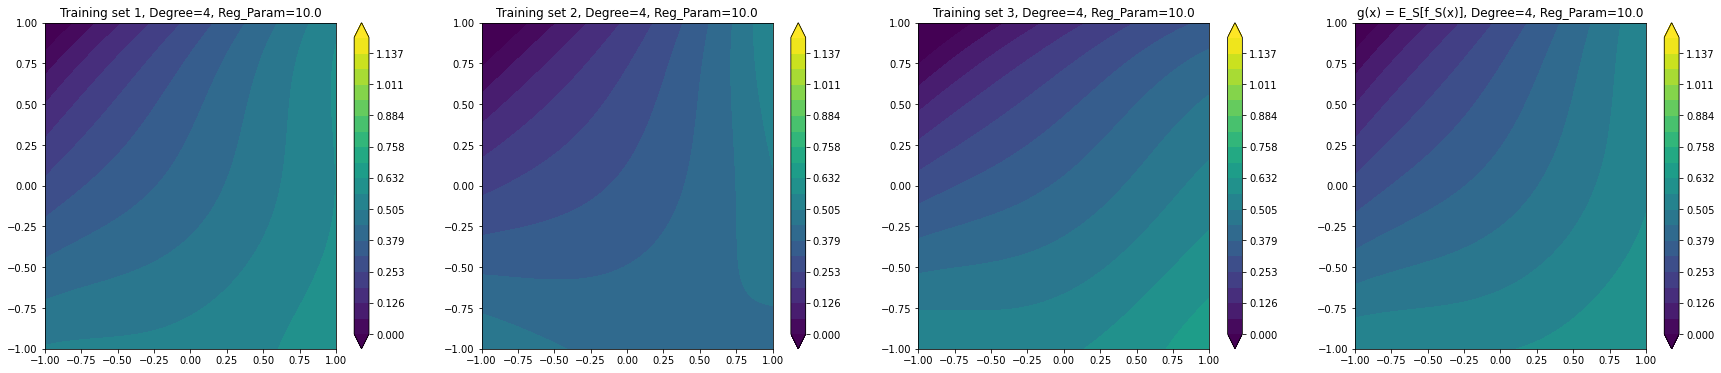

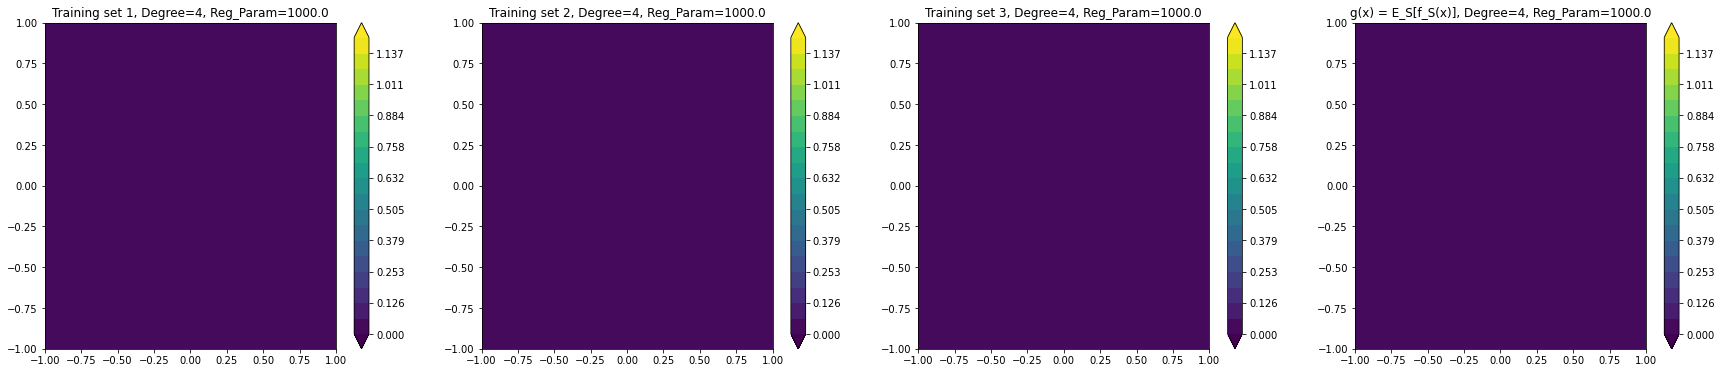

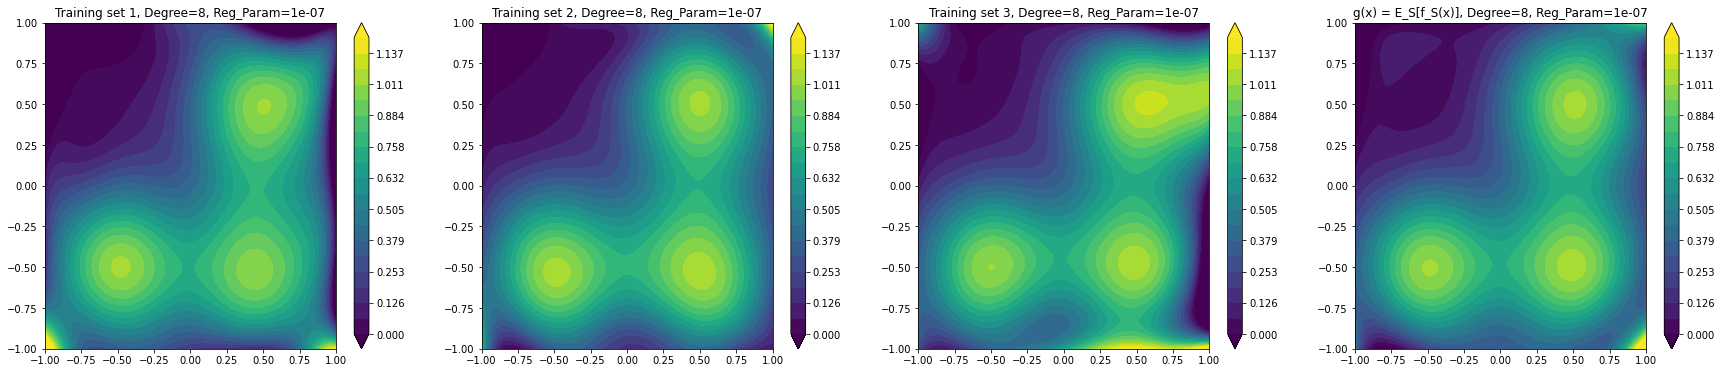

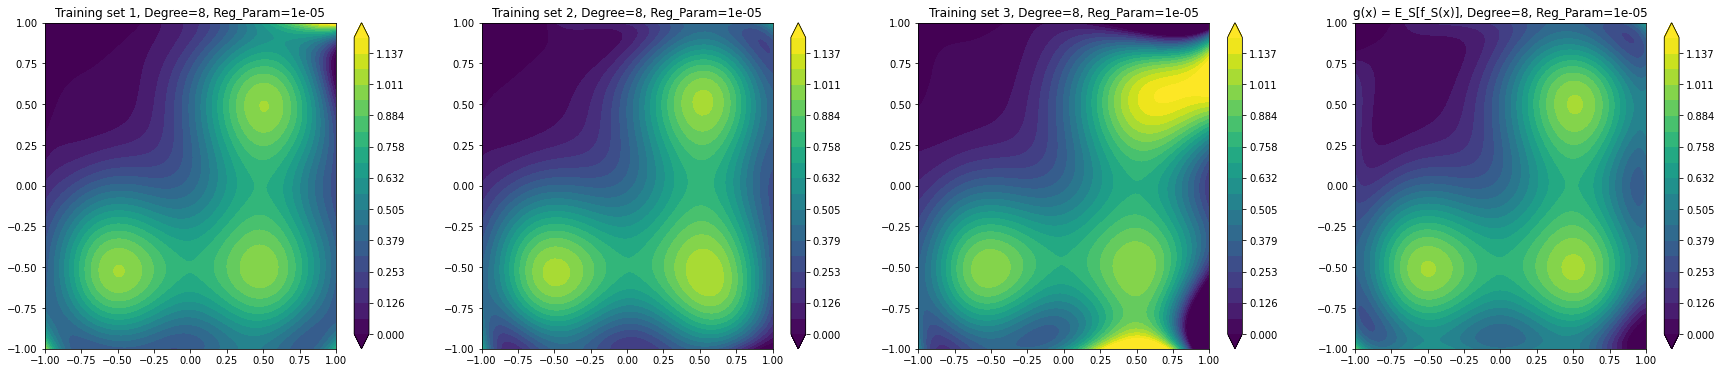

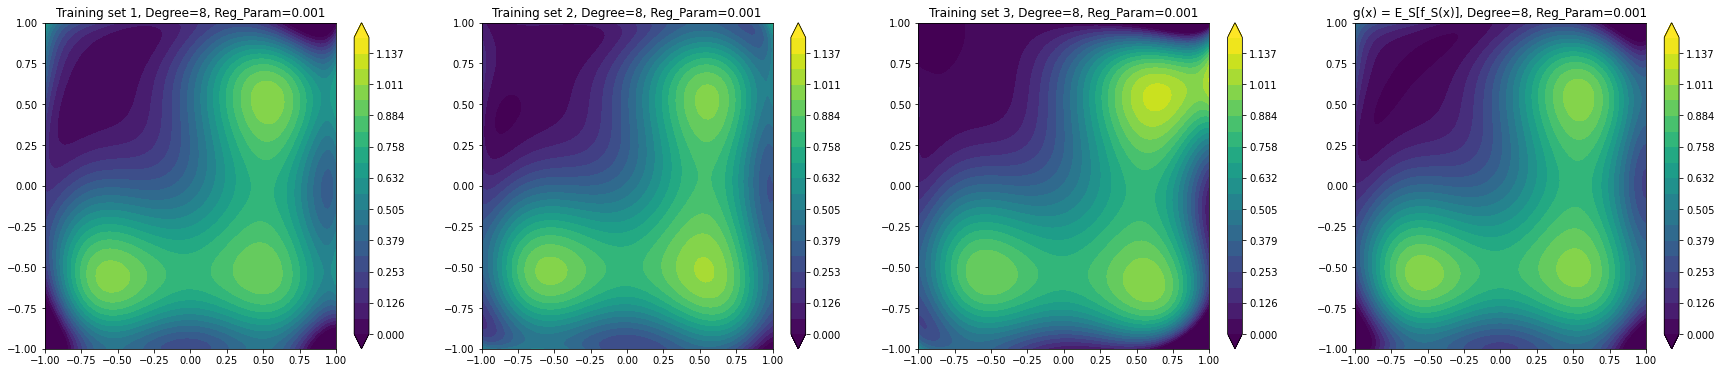

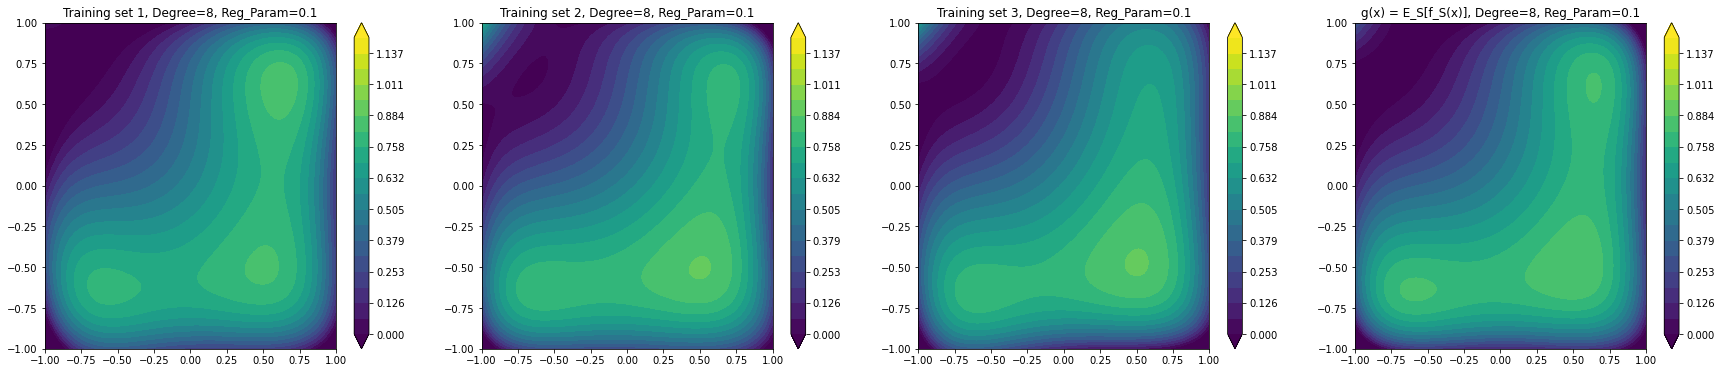

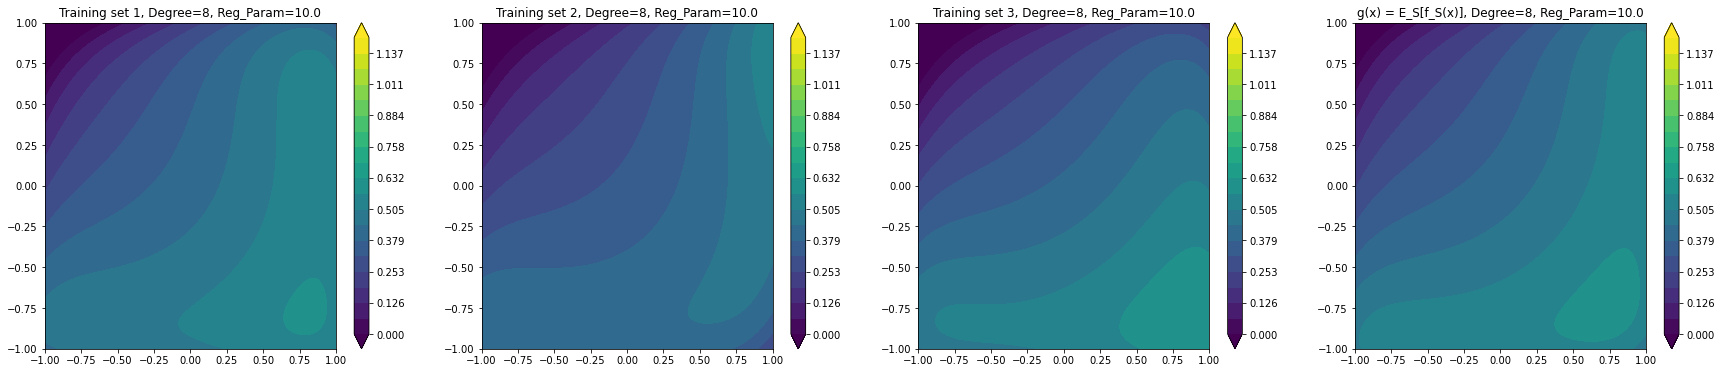

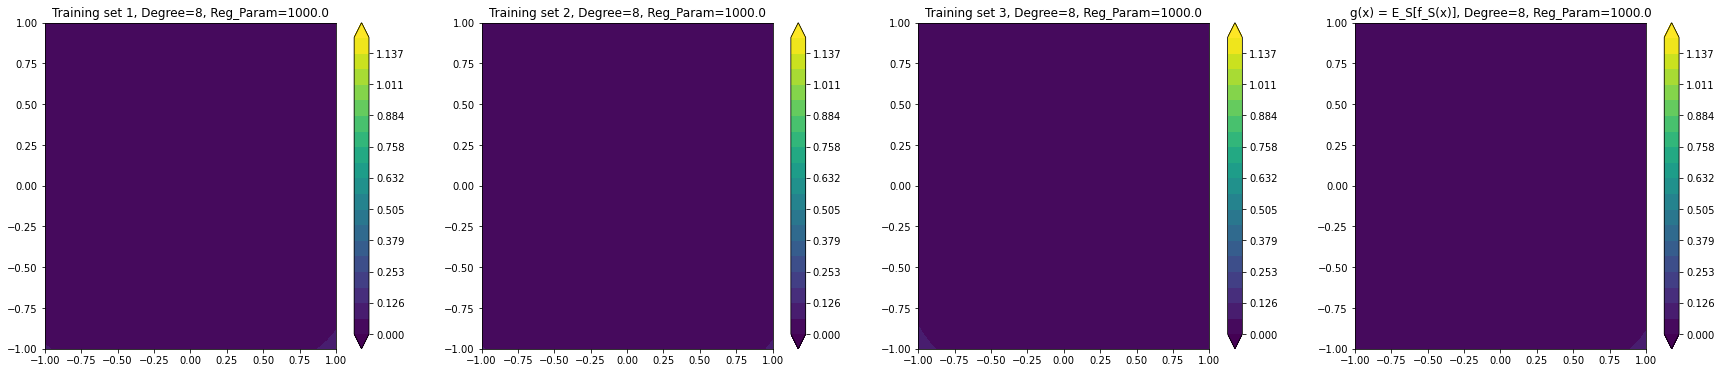

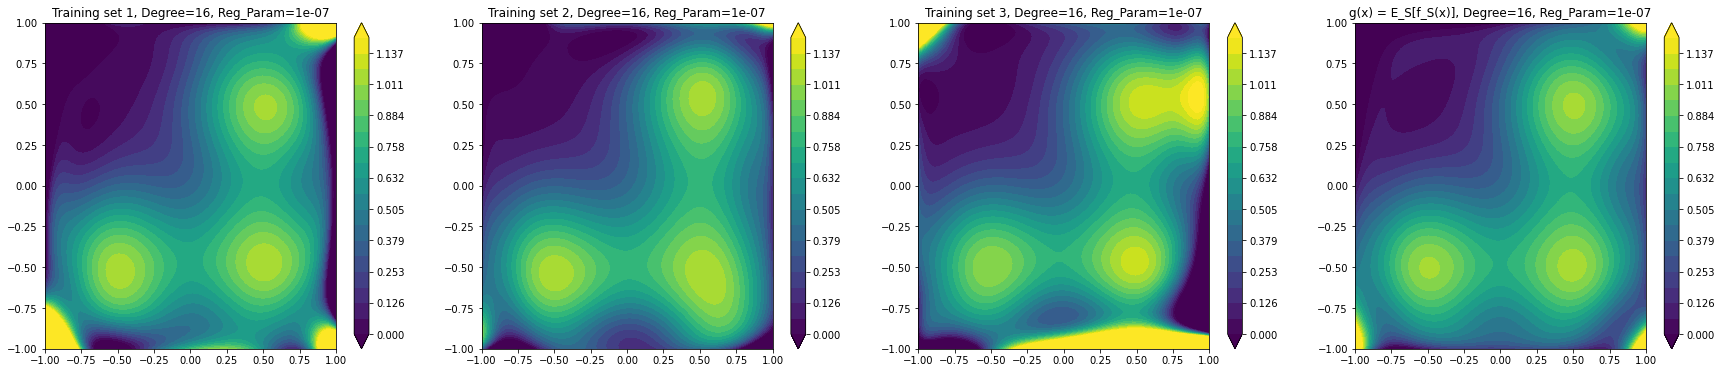

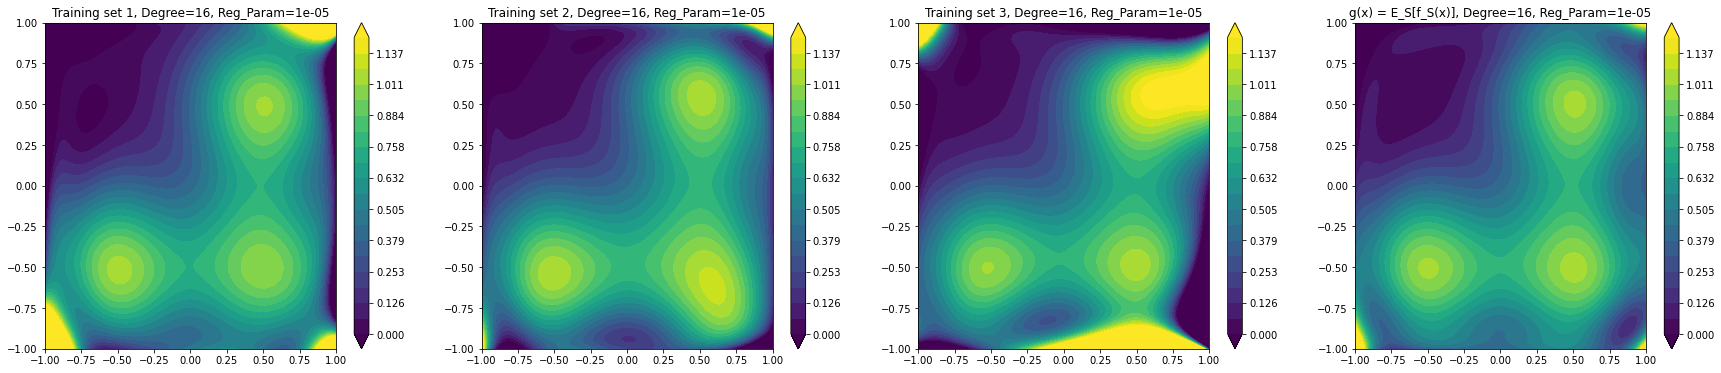

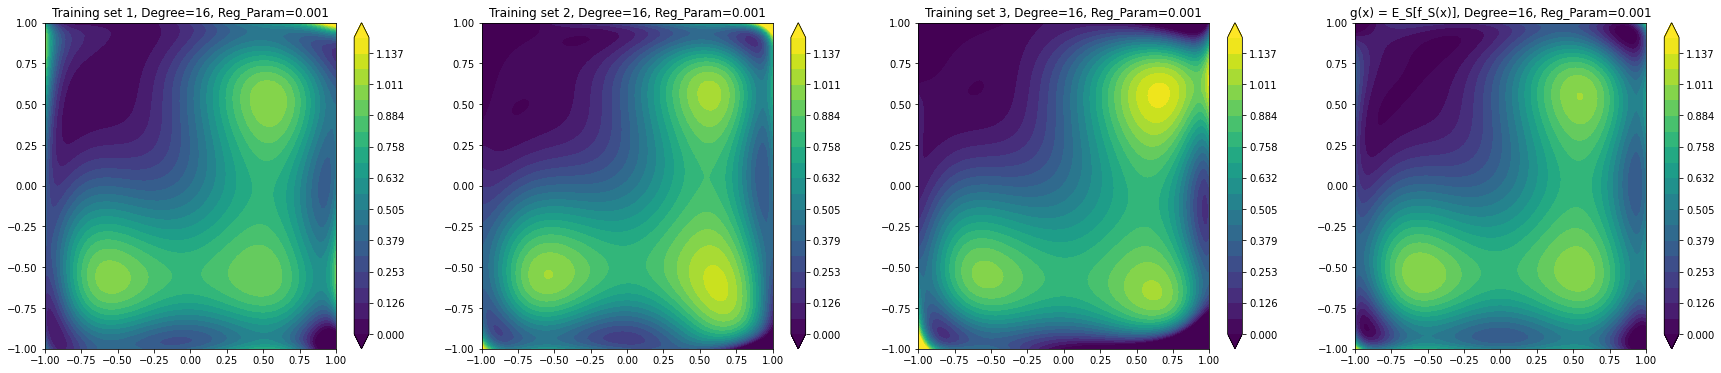

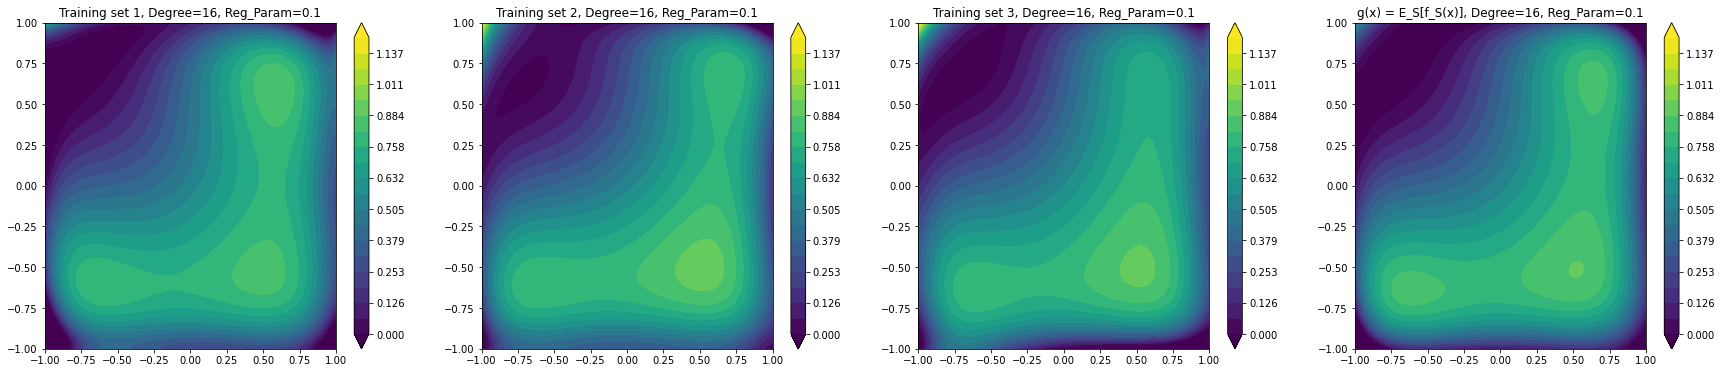

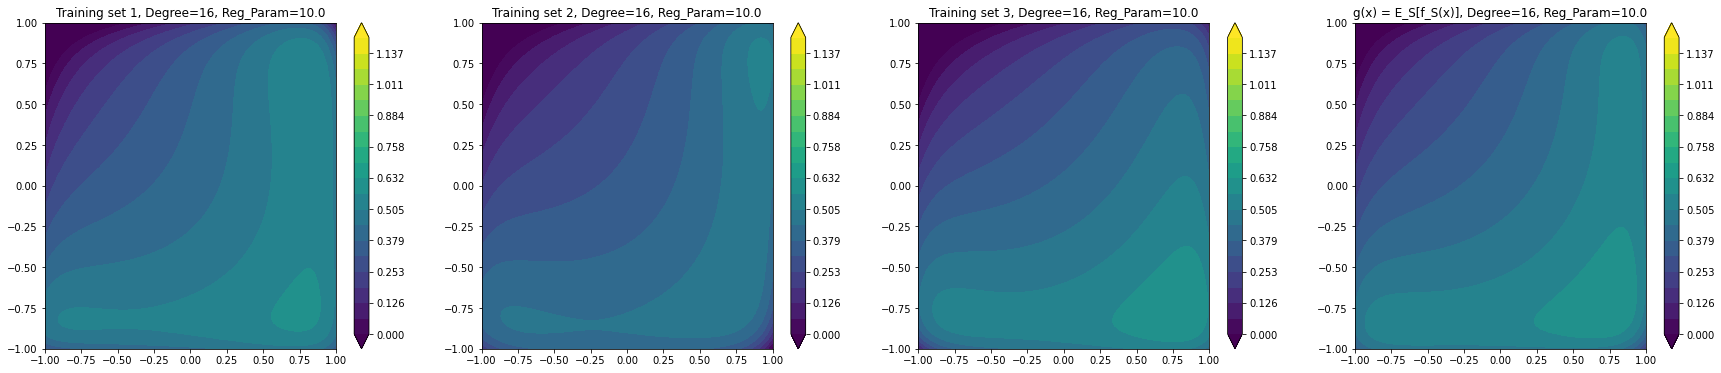

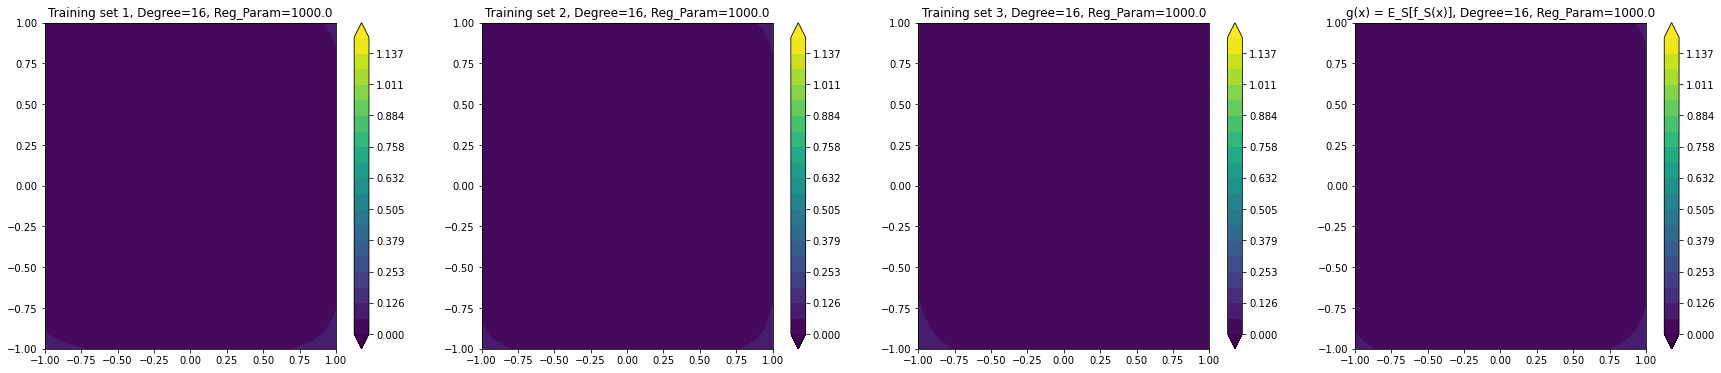

In [ ]:
# Cell type : CodeWrite

a = np.asarray([0.5,0.5])
b = np.asarray([-0.5,-0.5])
c = np.asarray([0.5,-0.5])
x1,x2 = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
Xsample = np.c_[x1.ravel(),x2.ravel()]
Ysample = np.exp(-4*np.sum((Xsample-a)**2,axis=1)) + np.exp(-4*np.sum((Xsample-b)**2,axis=1)) + np.exp(-4*np.sum((Xsample-c)**2,axis=1))
phisample = {}
for degree in [1,2,4,8,16]:
    powers = [(i, j) for i in range(degree+1) for j in range(degree-i+1)]
    phisample[degree] = np.asarray([[Xsample[i, 0]**j  *  Xsample[i, 1]**k for (j, k) in powers] for i in range(10000)])

def sample_ridge_pred(wt_vector, degree=1):
    phi = phisample[degree]
    Y_test_pred = phi @ wt_vector
    return Y_test_pred
    
def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    
    n = X_test.shape[0]
    powers = [(i, j) for i in range(degree+1) for j in range(degree-i+1)]
    #print(powers)
    phi = np.asarray([[X_test[i, 0]**j  *  X_test[i, 1]**k for (j, k) in powers] for i in range(n)])
    Y_test_pred = phi @ wt_vector
    return Y_test_pred
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """

    # Get Z using other functions
    
    Z = sample_ridge_pred(wt_vector, degree)
    Z = Z.reshape(100,100)
    #plt.contourf(x1, x2, Z, levels = np.linspace(Z.min(), Z.max(), 20), extend='both')
    plt.contourf(x1,x2,Z,levels=np.linspace(0.,1.2 , 20), extend='both')
    plt.title(title)
    plt.colorbar()

def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """

    n = X_train.shape[0]
    powers = [(i, j) for i in range(degree+1) for j in range(degree-i+1)]
    phi = np.asarray([[X_train[i, 0]**j  *  X_train[i, 1]**k for (j, k) in powers] for i in range(n)])
    W = np.linalg.pinv((phi.T @ phi) + (reg_param * np.identity(phi.shape[1]))) @ phi.T @ Y_train
    return W
    
X_trains = []
Y_trains = []
flag = 0

def get100sample(num_training_samples):
    global flag
    if flag==0 :
        flag = 1
        for r in range(100):
            X_train = np.random.rand(num_training_samples, 2)
            X_train = 2 * X_train - 1
            X_trains.append(X_train)
            Y_train = np.exp(-4*np.sum((X_train-a)**2,axis=1)) + np.exp(-4*np.sum((X_train-b)**2,axis=1)) + np.exp(-4*np.sum((X_train-c)**2,axis=1))
            Y_trains.append(Y_train)
    return
  
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    
    d_ = ((degree+1) * (degree+2)) // 2
    W = np.zeros((100, d_))
    
    for r in range(100):
        get100sample(num_training_samples)
        W[r, :] = polynomial_regression_ridge_train(X_trains[r], Y_trains[r], degree, reg_param)
    #print(W_avg.shape)
    W_avg = np.average(W, axis=0)
    #print(W_avg)
    ax1 = plt.subplot(1, 4, 1)
    visualise_polynomial_2d(W[0, :], degree)
    ax1.set_title('Training set {}, Degree={}, Reg_Param={}' .format(1,degree,reg_param))
    ax2 = plt.subplot(1, 4, 2)
    visualise_polynomial_2d(W[1, :], degree)
    ax2.set_title('Training set {}, Degree={}, Reg_Param={}' .format(2,degree,reg_param))
    ax3 = plt.subplot(1, 4, 3)
    visualise_polynomial_2d(W[2, :], degree) 
    ax3.set_title('Training set {}, Degree={}, Reg_Param={}' .format(3,degree,reg_param))
    ax4 = plt.subplot(1, 4, 4)
    visualise_polynomial_2d(W_avg, degree)
    ax4.set_title('g(x) = E_S[f_S(x)], Degree={}, Reg_Param={}' .format(degree,reg_param))
    
    variance = 0
    mse = 0
    gx = sample_ridge_pred(W_avg, degree)
    bias = np.sum((Ysample - gx)**2)/10000
    for r in range(100):
        fx = sample_ridge_pred(W[r], degree)
        variance += np.sum((fx - gx)**2)/10000
        mse += np.sum((fx - Ysample)**2)/10000
    variance = variance / 100
    mse = mse / 100
    #print(mse - (bias + variance))
    
    return bias, variance, mse

for degree in [1,2,4,8,16]:
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        plt.figure(figsize=(30,6))
        
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        
        """print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))"""

        

In [ ]:
# Cell type: convenience



** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.

-----
#### Tables
##### Bias
Regularisation parameter|Degree 1|Degree 2|Degree 4|Degree 8|Degree 16
-|-:|-:|-:|-:|-:
**$\lambda=10^{-7}$**|$0.0551$|$0.0349$|$0.00869$|$0.00834$|$0.01601$
**$\lambda=10^{-5}$**|$0.0551$|$0.0349$|$0.00868$|$0.00387$|$0.01346$
**$\lambda=10^{-3}$**|$0.0551$|$0.0349$|$0.00845$|$0.00587$|$0.00646$
**$\lambda=10^{-1}$**|$0.0551$|$0.0348$ |$0.00909$| $0.00934$|$0.01205$
**$\lambda=10^1$**|$0.0657$|$0.0620$ |$0.0599$| $0.05639$|$0.05350$
**$\lambda=10^3$**|$0.3074$|$0.3038$ |$0.3024$| $0.30163$|$0.30124$

##### Variance
Regularisation parameter|Degree 1|Degree 2|Degree 4|Degree 8|Degree 16
-|-:|-:|-:|-:|-:
**$\lambda=10^{-7}$**|$0.00349$|$0.00556$|$0.01017$|$0.25445$|$0.4053$
**$\lambda=10^{-5}$**|$0.00349$|$0.00556$|$0.01016$|$0.03988$|$0.17732$
**$\lambda=10^{-3}$**|$0.00349$|$0.00556$|$0.00952$|$0.02118$|$0.05777$
**$\lambda=10^{-1}$**|$0.00344$|$0.00528 $|$0.00434$|$0.00699$|$0.01211$
**$\lambda=10^{1}$**|$0.00163$|$0.00184$|$0.00220$|$0.00244$|$0.00261$
**$\lambda=10^{3}$**|$.628e^-5$|$.784e^-5$|$.107e^-4$|$.140e^-4$|$.172e^-4$

-------
#### Observations

* With a fixed $\lambda$, variance increases with degree as with more degree it has more freedom to pass a curve that fits all the points without much change in error.
* With a fixed $\lambda$, bias decreases with degree as with more degree it can fit a more complex function through the data.
* As $\lambda$ decreases, variance increases and bias decreases.
* As $\lambda$ increases, variance decreases and bias increases.
* One thing to note is that for degree 16 and low $\lambda$ the bias is actually higher than that with degree 8. This is because of the way we are calculating bias, we are estimating g(x) by taking average over 100 iterations, but since degree 16 has a high variance this estimate is turning out to be wrong as we need more iterations to estimate g(x) when variance is high.

** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




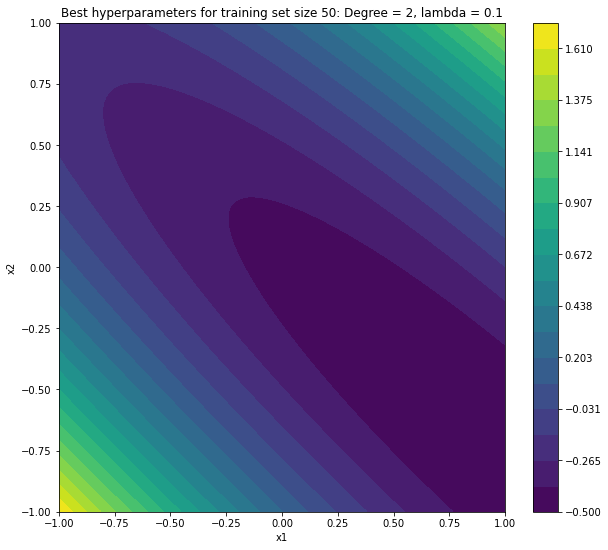

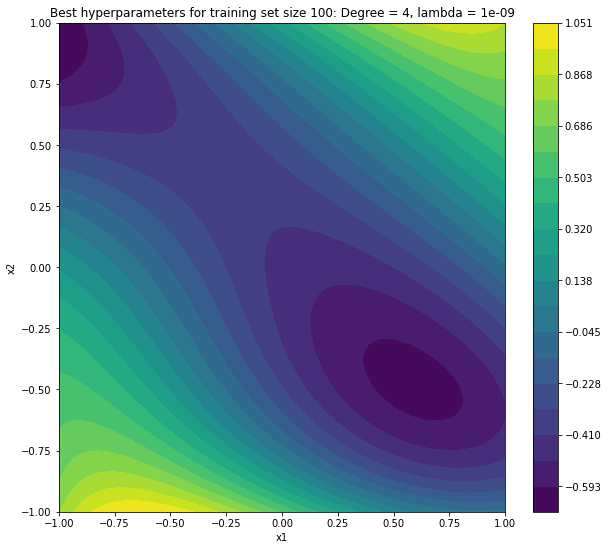

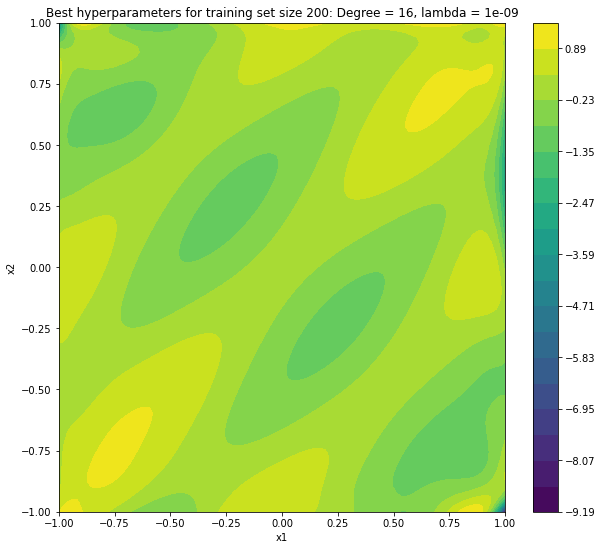

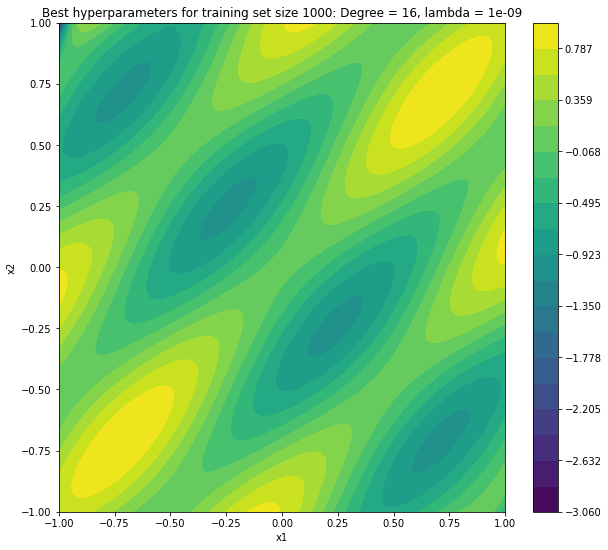

In [ ]:
# Cell type : CodeWrite 
lambdas = np.logspace(-9, 1, 6, base=10)
degrees = np.logspace(0, 4, 5, base=2).astype(int)

dataset4_1 = np.load('../../Data/dataset4_1.npz')
X_train, Y_train, X_test, Y_test = dataset4_1['arr_0'], dataset4_1['arr_1'], dataset4_1['arr_2'], dataset4_1['arr_3']

X,Y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
x = np.c_[X.ravel(), Y.ravel()]

for size in [50, 100, 200, 1000]:
    traintemp = np.zeros((lambdas.shape[0], degrees.shape[0]))
    testtemp = np.zeros((lambdas.shape[0], degrees.shape[0]))
    for ii in range(lambdas.shape[0]):
        for jj in range(degrees.shape[0]):
            l = lambdas[ii]
            degree = degrees[jj]
            W = polynomial_regression_ridge_train(X_train[:size], Y_train[:size], degree=degree, reg_param=l)
            Ytrainp = polynomial_regression_ridge_pred(X_train[:size], W, degree=degree)
            Ytestp = polynomial_regression_ridge_pred(X_test, W, degree=degree)
            trainrisk = np.average((Ytrainp - Y_train[:size])**2)
            traintemp[ii, jj] = trainrisk
            testrisk =  np.average((Ytestp - Y_test)**2)
            testtemp[ii, jj] = testrisk
    """np.set_printoptions(precision=4)
    print(np.round(testtemp, 4))
    print(np.round(traintemp, 4))"""
    bestl, bestd = np.unravel_index(np.argmin(testtemp, axis=None), testtemp.shape)
    bestl = lambdas[bestl]
    bestd = degrees[bestd]
    bestW = polynomial_regression_ridge_train(X_train[:size], Y_train[:size], degree=bestd, reg_param=bestl)
    Z = polynomial_regression_ridge_pred(x, bestW, bestd)
    Z = Z.reshape(X.shape)
    fig = plt.gcf()
    fig.set_size_inches(10, 9)
    cs = plt.contourf(X, Y, Z, levels = np.linspace(Z.min(), Z.max(), 20))
    plt.title('Best hyperparameters for training set size {}: Degree = {}, lambda = {}'.format(size, bestd, bestl))
    plt.gca().set_xlabel('x1')
    plt.gca().set_ylabel('x2')
    plt.colorbar(cs)
    plt.show()




** Cell type : TextWrite **

-----

#### Errors
##### Dataset size = 50

Train Error|$\lambda=10^{-9}$|$\lambda=10^{-7}$|$\lambda=10^{-5}$|$\lambda=10^{-3}$|$\lambda=10^{-1}$|$\lambda=10^{1}$        
-|-:|-:|-:|-:|-:|-:
**Degree 1**|$0.2504$ |$0.2504$ |$0.2504$ |$0.2504$ |$0.2504$ |$0.2559$ 
**Degree 2**|$0.1341$ |$0.1341$ |$0.1341$ |$0.1341$ |$0.1342$ |$0.1975$ 
**Degree 4**|$0.102$ |$0.102$ |$0.102$ |$0.102$ |$0.1041$ |$0.1806$ 
**Degree 8**|$0.0001$ |$0.0002$ |$0.0108$ |$0.0417$ |$0.082$ |$0.1632$ 
**Degree 16**|$0.0$ |$0.0$ |$0.0013$ |$0.0311$ |$0.07$ |$0.15$ 


Test Error|$\lambda=10^{-9}$|$\lambda=10^{-7}$|$\lambda=10^{-5}$|$\lambda=10^{-3}$|$\lambda=10^{-1}$|$\lambda=10^{1}$        
-|-:|-:|-:|-:|-:|-:
**Degree 1**|$0.3013$ |$0.3013$ |$0.3013$ |$0.3013$ |$0.3008$ |$0.2784$ 
**Degree 2**|$0.1579$ |$0.1579$ |$0.1579$ |$0.1579$ |$0.1567$|$0.2082$ 
**Degree 4**|$0.1573$ |$0.1573$ |$0.1573$ |$0.1572$ |$0.1618$ |$0.1966$ 
**Degree 8**|$237.6901$ |$172.5019$ |$18.5943$ |$0.9903$ |$0.1652$ |$0.1939$ 
**Degree 16**|$250.522$ |$232.0248$ |$66.6977$ |$2.3373$ |$0.204$ |$0.1961$ 

##### Dataset size = 100

Train Error|$\lambda=10^{-9}$|$\lambda=10^{-7}$|$\lambda=10^{-5}$|$\lambda=10^{-3}$|$\lambda=10^{-1}$|$\lambda=10^{1}$        
-|-:|-:|-:|-:|-:|-:
**Degree 1**|$0.2581$ |$0.2581$ |$0.2581$ |$0.2581$ |$0.2581$ |$0.2587$ 
**Degree 2**|$0.131$ |$0.131$ |$0.131$ |$0.131$ |$0.131$ |$0.165$ 
**Degree 4**|$0.113$ |$0.113$ |$0.113$ |$0.113$ |$0.1137$ |$0.1524$ 
**Degree 8**|$0.0416$ |$0.0416$ |$0.0417$ |$0.058$ |$0.0929$ |$0.1449$ 
**Degree 16**|$0.0$ |$0.0005$ |$0.0075$ |$0.0417$ |$0.0837$ |$0.1395$ 


Test Error|$\lambda=10^{-9}$|$\lambda=10^{-7}$|$\lambda=10^{-5}$|$\lambda=10^{-3}$|$\lambda=10^{-1}$|$\lambda=10^{1}$        
-|-:|-:|-:|-:|-:|-:
**Degree 1**|$0.2731$ |$0.2731$ |$0.2731$ |$0.2731$ |$0.2731$ |$0.2686$ 
**Degree 2**|$0.1532$ |$0.1532$ |$0.1532$ |$0.1532$ |$0.1529$ |$0.1757$ 
**Degree 4**|$0.1428$|$0.1428$ |$0.1428$ |$0.1428$ |$0.146$ |$0.169$ 
**Degree 8**|$0.7129$ |$0.7113$ |$0.5808$ |$0.2036$ |$0.1626$ |$0.1712$ 
**Degree 16**|$54.08$ |$11.7704$ |$23.4166$ |$0.4178$ |$0.1884$ |$0.1742$

##### Dataset size = 200

Train Error|$\lambda=10^{-9}$|$\lambda=10^{-7}$|$\lambda=10^{-5}$|$\lambda=10^{-3}$|$\lambda=10^{-1}$|$\lambda=10^{1}$        
-|-:|-:|-:|-:|-:|-:
**Degree 1**|$0.2465$ |$0.2465$ |$0.2465$ |$0.2465$ |$0.2465$ |$0.2466$ 
**Degree 2**|$0.1337$ |$0.1337$ |$0.1337$ |$0.1337$ |$0.1337$ |$0.1475$ 
**Degree 4**|$0.1133$ |$0.1133$ |$0.1133$ |$0.1133$ |$0.1136$ |$0.1444$ 
**Degree 8**|$0.0617$ |$0.0617$ |$0.0617$ |$0.0639$ |$0.0957$ |$0.1412$ 
**Degree 16**|$0.0$ |$0.0011$ |$0.0113$ |$0.0445$ |$0.0835$ |$0.1338$ 


Test Error|$\lambda=10^{-9}$|$\lambda=10^{-7}$|$\lambda=10^{-5}$|$\lambda=10^{-3}$|$\lambda=10^{-1}$|$\lambda=10^{1}$        
-|-:|-:|-:|-:|-:|-:
**Degree 1**|$0.2677$ |$0.2677$ |$0.2677$ |$0.2677$ |$0.2676$ |$0.2662$ 
**Degree 2**|$0.1458$ |$0.1458$ |$0.1458$ |$0.1458$ |$0.1458$ |$0.1587$ 
**Degree 4**|$0.1312$ |$0.1312$ |$0.1312$ |$0.1312$ |$0.1308$ |$0.1571$ 
**Degree 8**|$0.1374$ |$0.1374$ |$0.137$ |$0.1182$ |$0.114$ |$0.1565$ 
**Degree 16**|$0.0372$|$0.0837$ |$0.1708$ |$0.0869$ |$0.1112$ |$0.1522$ 

##### Dataset size = 1000

Train Error|$\lambda=10^{-9}$|$\lambda=10^{-7}$|$\lambda=10^{-5}$|$\lambda=10^{-3}$|$\lambda=10^{-1}$|$\lambda=10^{1}$        
-|-:|-:|-:|-:|-:|-:
**Degree 1**|$0.2407$ |$0.2407$ |$0.2407$ |$0.2407$ |$0.2407$ |$0.2407$ 
**Degree 2**|$0.1388$ |$0.1388$ |$0.1388$ |$0.1388$ |$0.1388$ |$0.1397$ 
**Degree 4**|$0.125$ |$0.125$ |$0.125$ |$0.125$ |$0.125$ |$0.1342$ 
**Degree 8**|$0.0767$ |$0.0767$ |$0.0767$ |$0.0768$ |$0.0948$ |$0.1284$ 
**Degree 16**|$0.0$ |$0.0004$ |$0.0065$ |$0.0384$ |$0.085$ |$0.1217$ 


Test Error|$\lambda=10^{-9}$|$\lambda=10^{-7}$|$\lambda=10^{-5}$|$\lambda=10^{-3}$|$\lambda=10^{-1}$|$\lambda=10^{1}$        
-|-:|-:|-:|-:|-:|-:
**Degree 1**|$0.2625$ |$0.2625$ |$0.2625$ |$0.2625$ |$0.2625$ |$0.2625$ 
**Degree 2**|$0.1424$ |$0.1424$ |$0.1424$ |$0.1424$ |$0.1424$ |$0.1445$ 
**Degree 4**|$0.1271$ |$0.1271$ |$0.1271$ |$0.1271$ |$0.1272$ |$0.1409$ 
**Degree 8**|$0.0848$ |$0.0848$ |$0.0848$ |$0.0839$ |$0.0978$ |$0.135$ 
**Degree 16**|$0.0012$|$0.0015$ |$0.011$ |$0.0497$ |$0.0907$ |$0.1278$ 

------

#### Observations

* We can see that regularisation helps prevent overfitting especially with high degrees and when the data size is low. For example we can see the test error reduce drastically as the regularisation parameter increases with dataset size of 50. 
* With larger dataset sizes and higher degrees, regularisation doesnt help much and in fact increases the test error slightly. This is because when we have more data points, variance automatically decreases as the freedom gained by the increased degree is not misused due to the restrictions of fitting the large number of datapoints.

Best Fit|Degree|Regularisation Parameter|
-|-:|-:
**Subset Size=50**|$2$ |$0.1$ 
**Subset Size=100**|$4$ |$10^{-9}$ 
**Subset Size=200**|$16$ |$10^{-9}$ 
**Subset Size=1000**|$16$ |$10^{-9}$

** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.












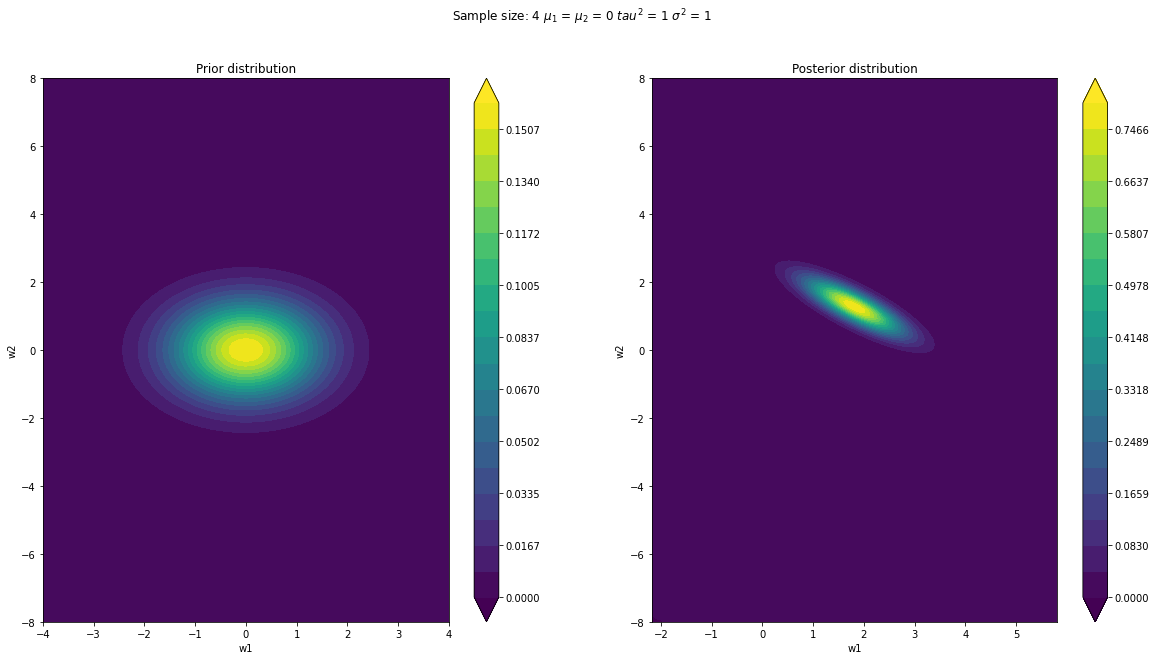

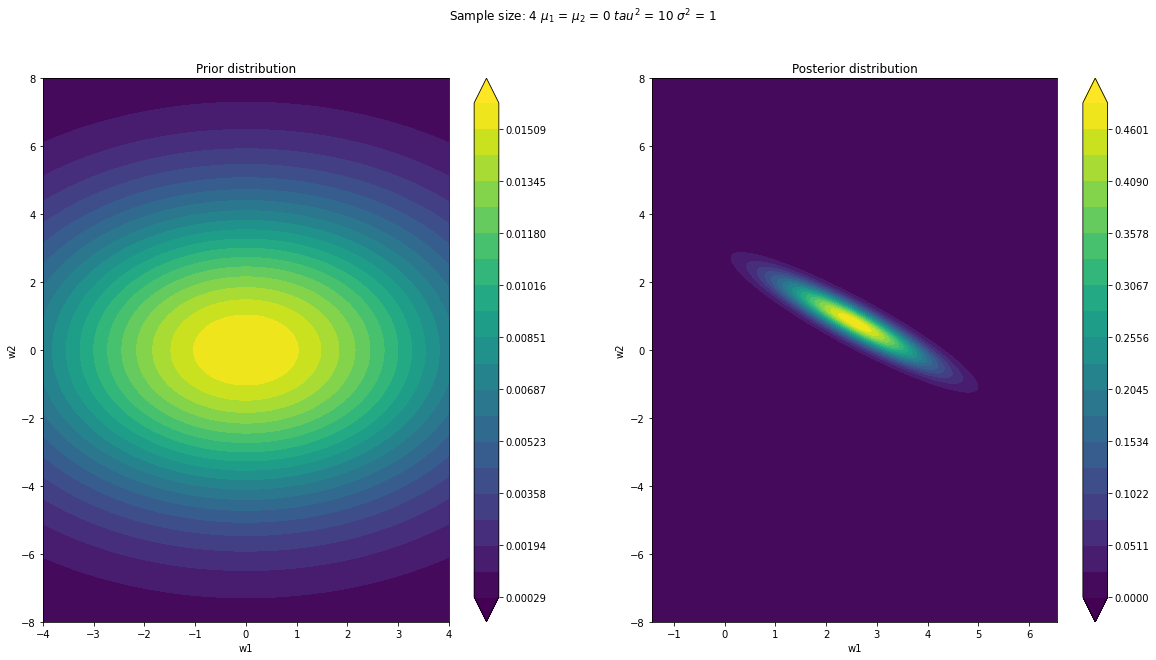

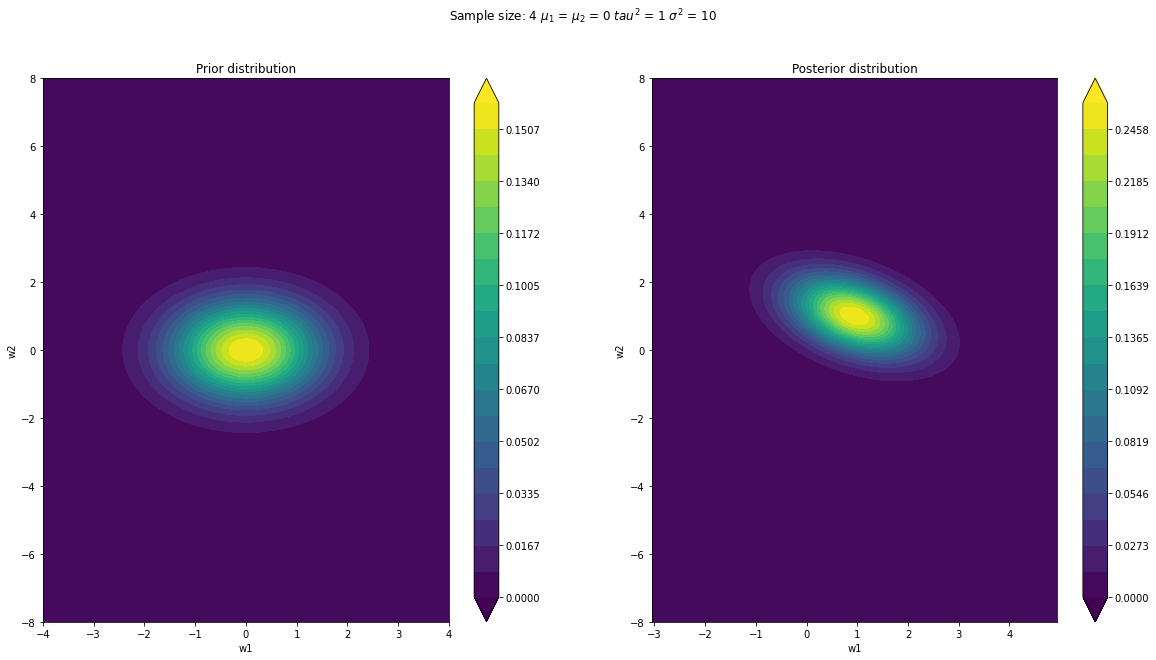

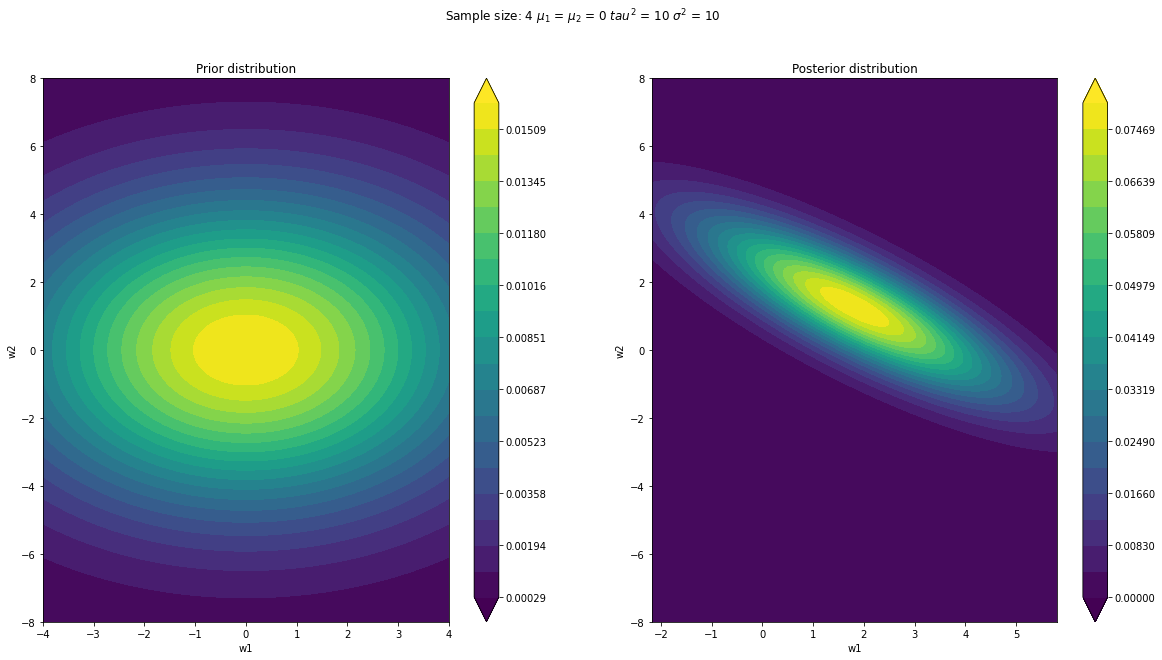

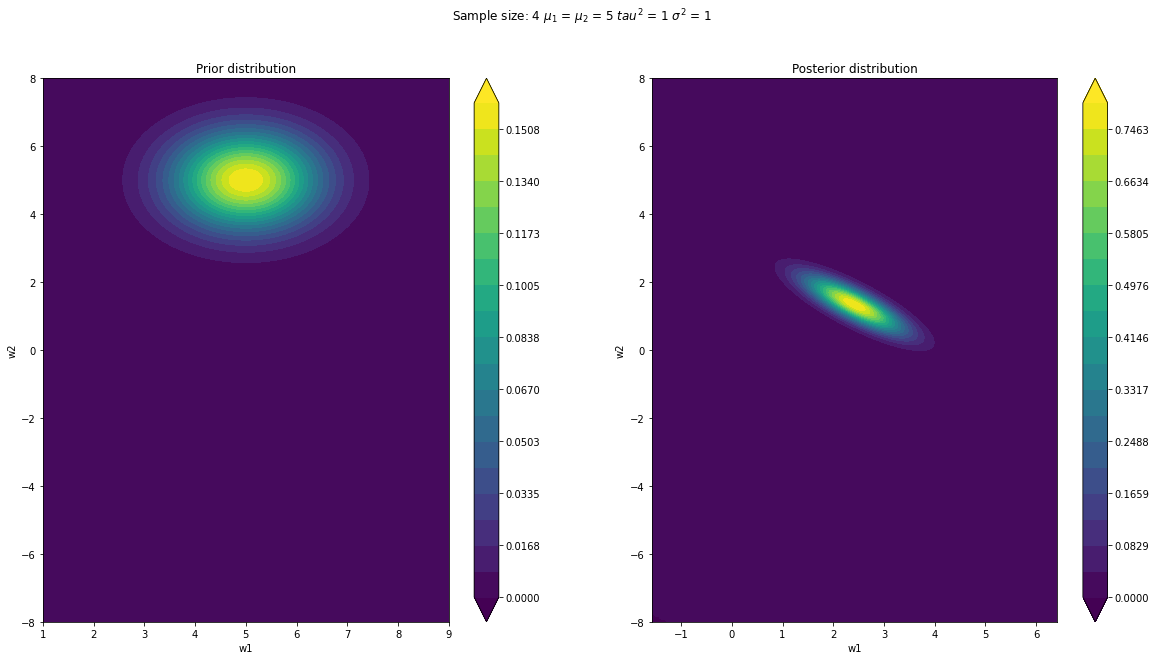

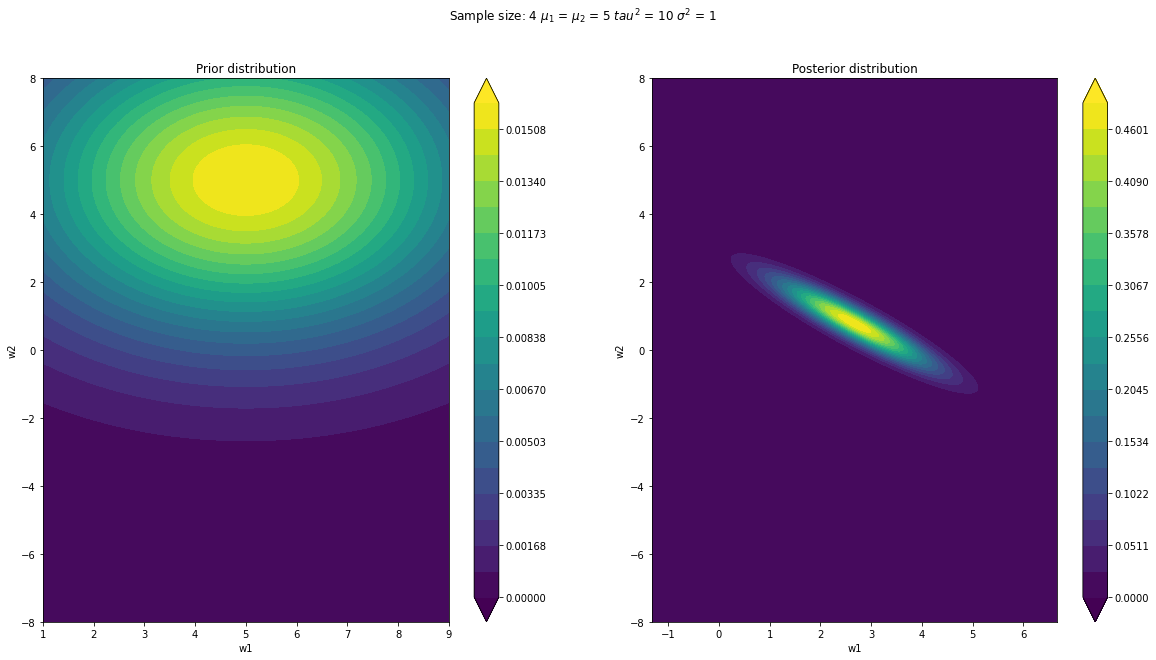

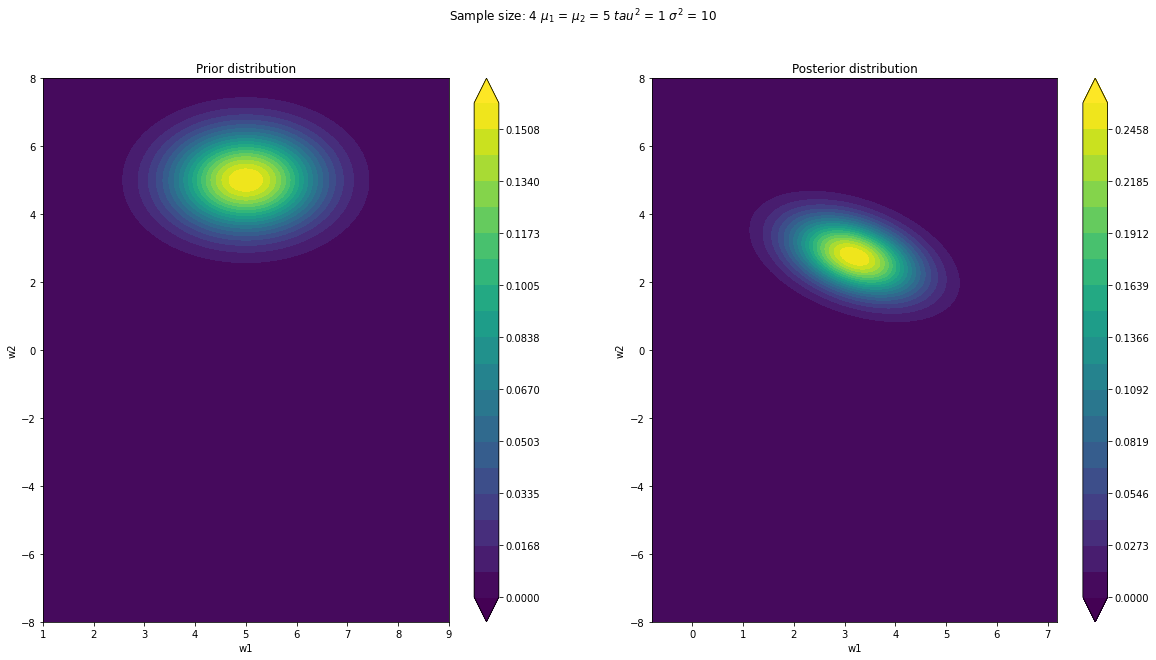

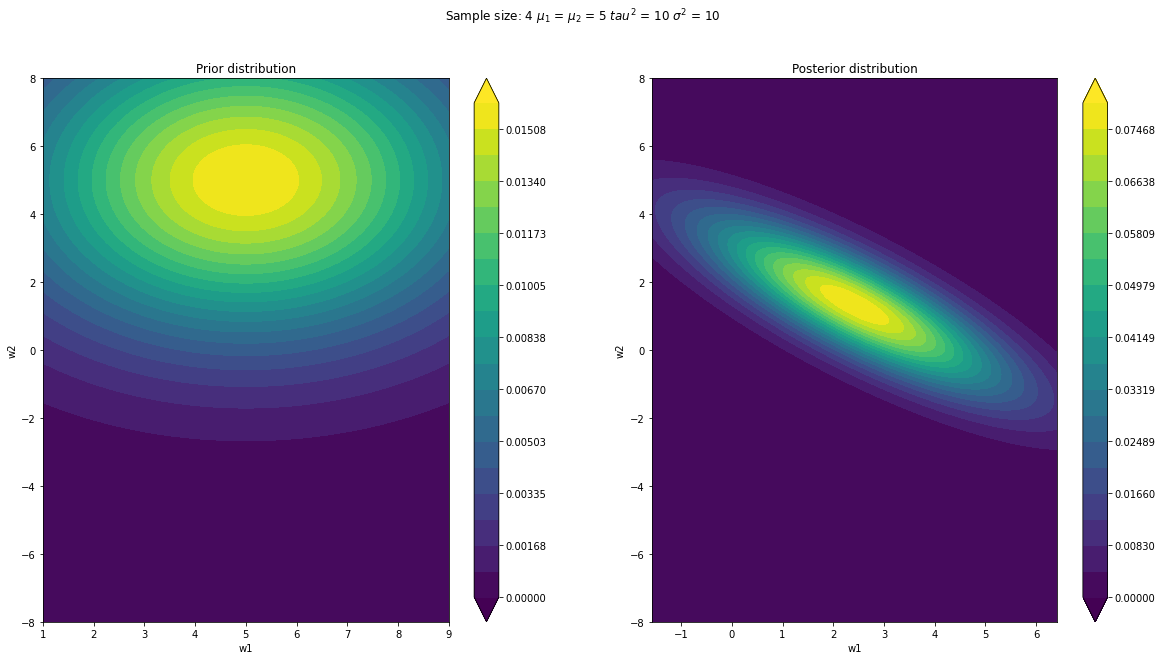

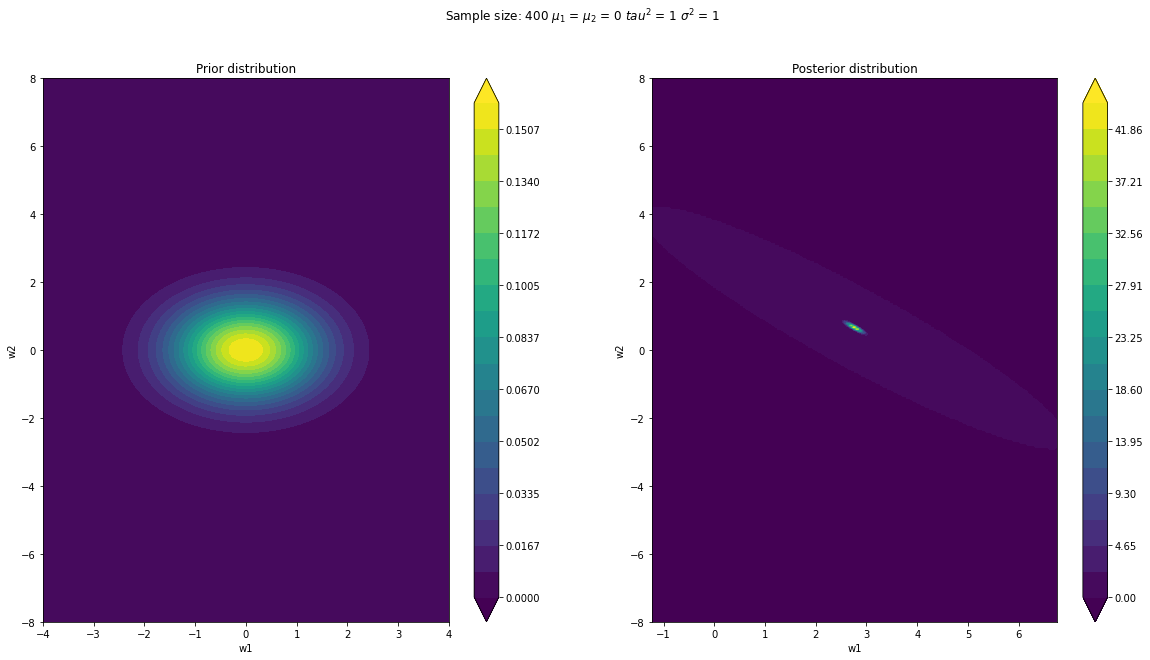

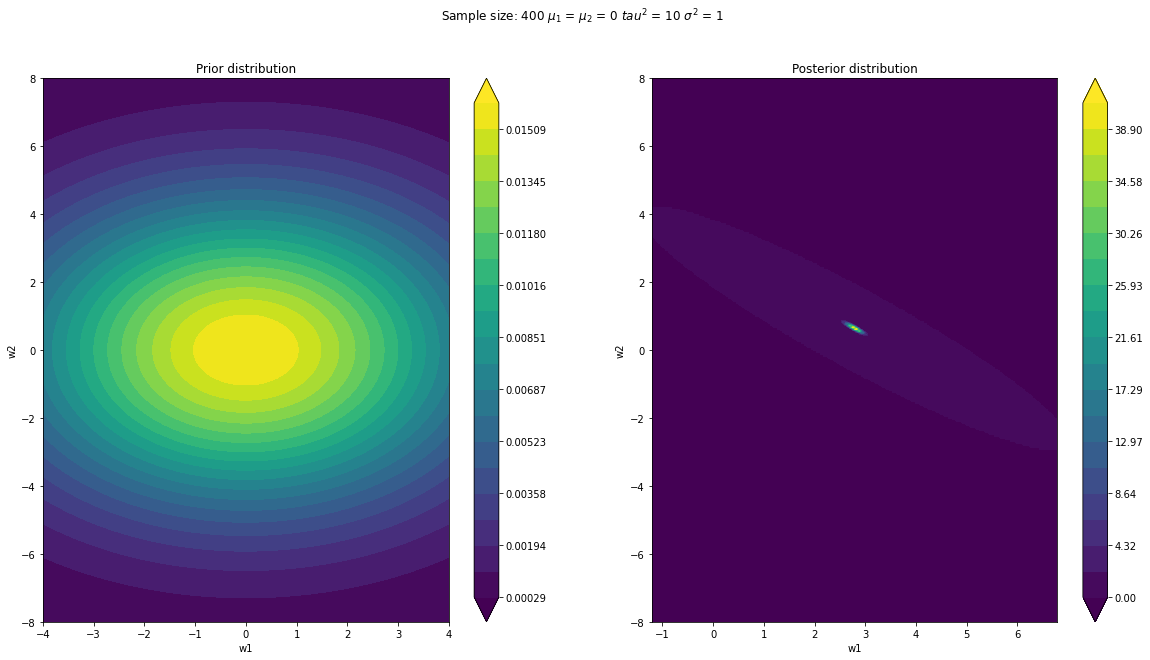

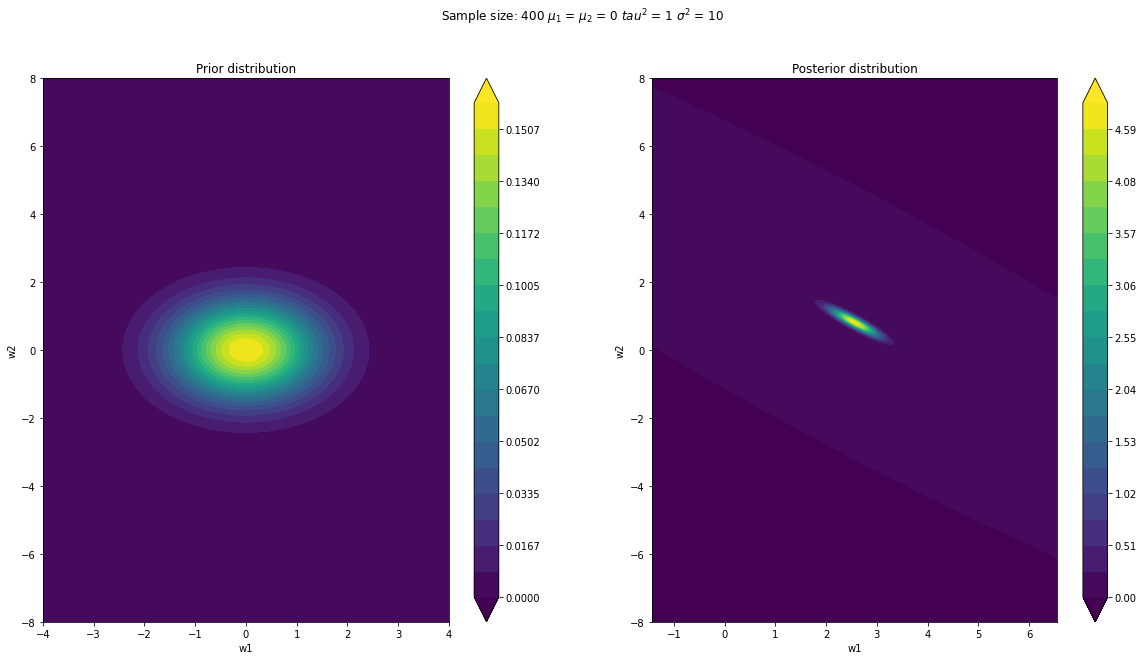

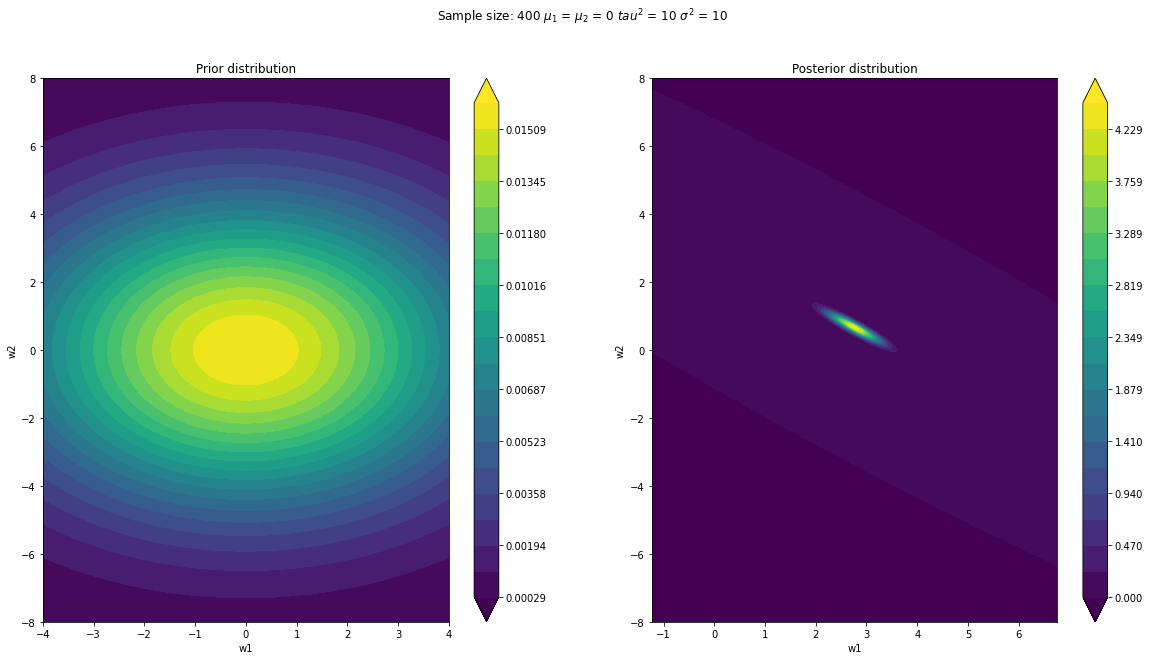

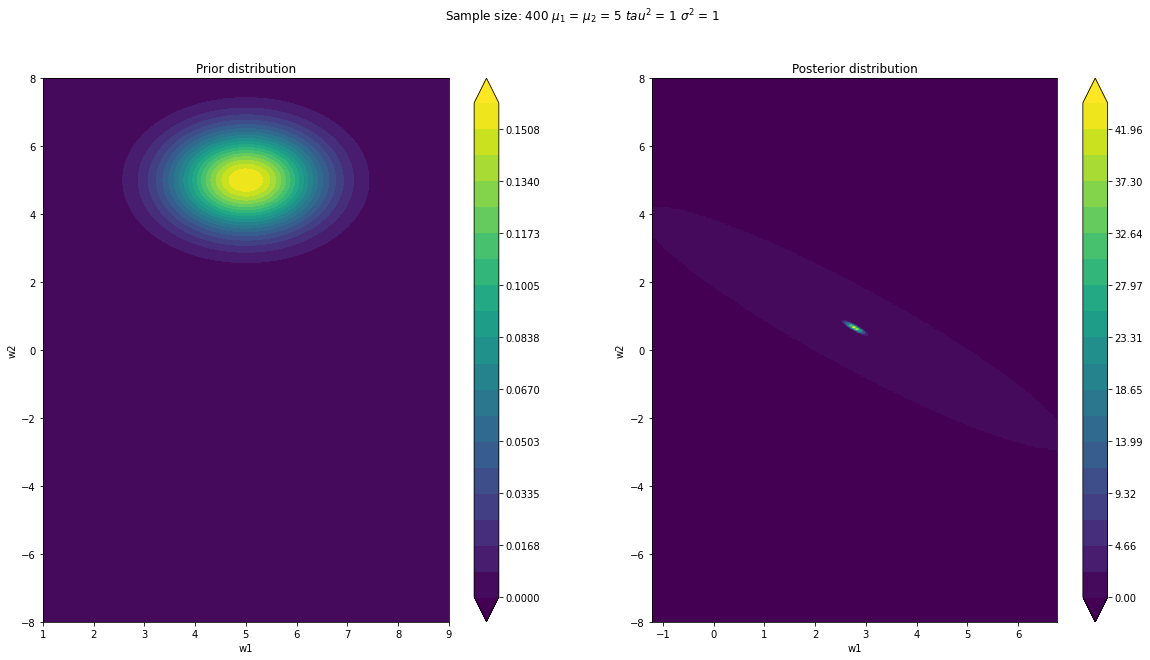

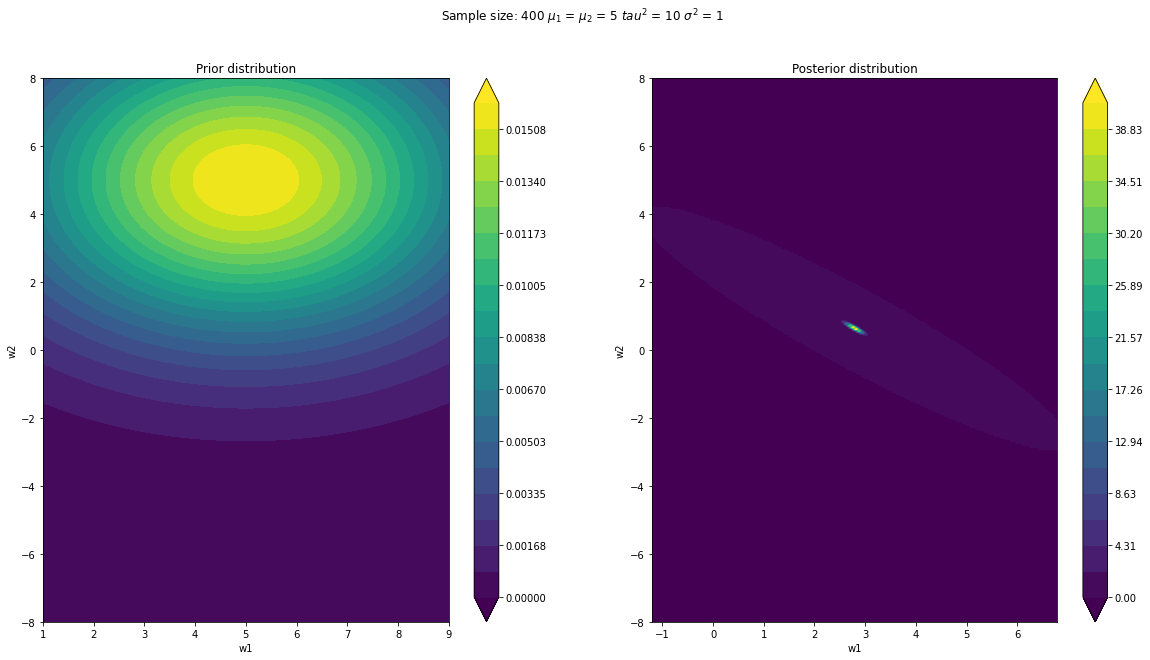

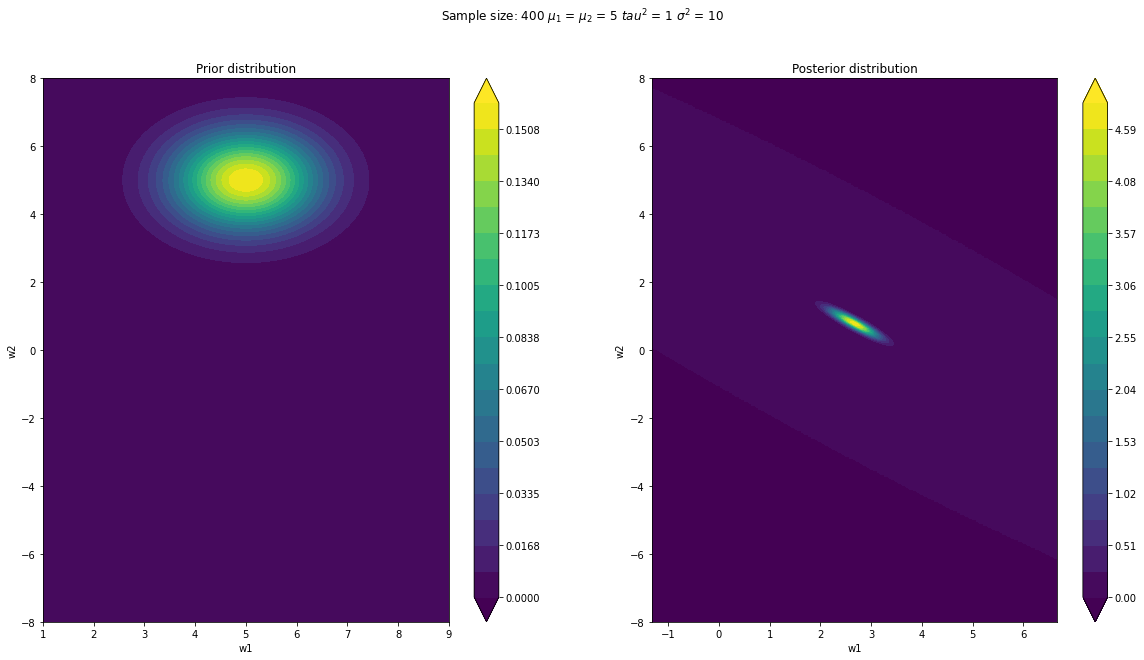

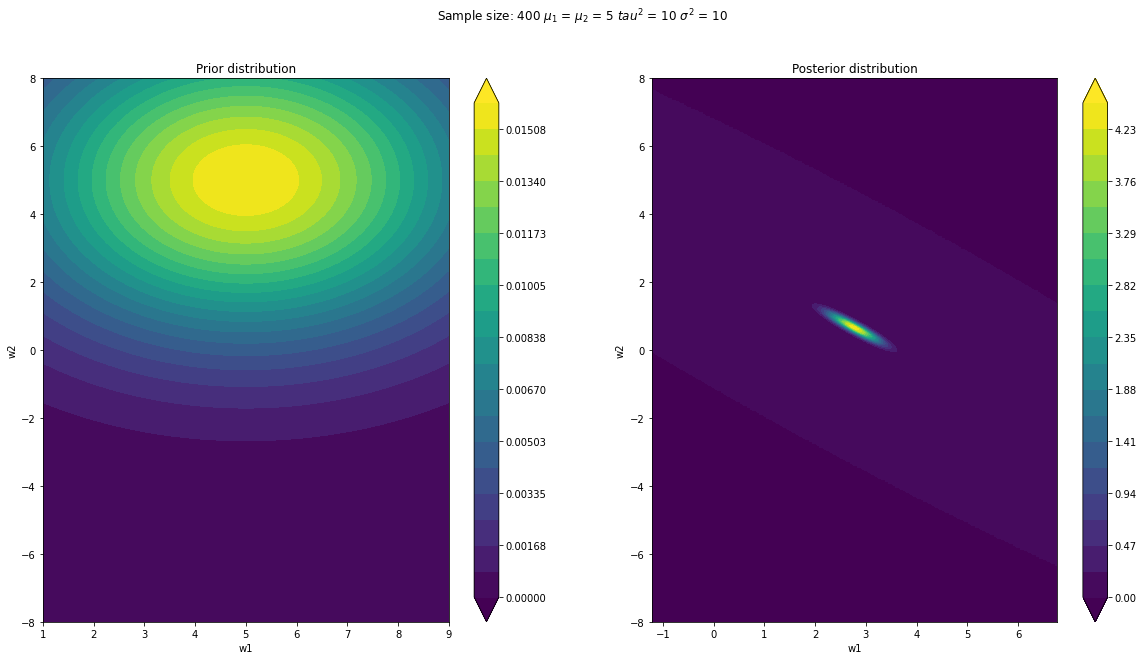

In [3]:
# Cell type : CodeWrite 
def gaussprobab(W, mu, sigma):
    temp1 = np.linalg.det(sigma) ** (-1/2)
    temp2 = np.asarray([np.exp(-.5 * (W[i] - mu).T @ np.linalg.inv(sigma) @ (W[i] - mu)) for i in range(W.shape[0])])
    return (2 * np.pi) ** (-1) * temp1 * temp2

def gaussplot(mu, S, title):
    X,Y = np.meshgrid(np.linspace(mu[0]-4, mu[0] + 4, 300), np.linspace(-8, +8, 300))
    x = np.c_[X.ravel(), Y.ravel()]
    Z = gaussprobab(x, mu, S)
    Z = Z.reshape(X.shape)
    cs = plt.contourf(X, Y, Z, levels = np.linspace(Z.min(), Z.max(), 20), extend = "both")
    plt.title(title)
    plt.gca().set_xlabel('w1')
    plt.gca().set_ylabel('w2')
    plt.colorbar(cs)

def solvef(X_train, Y_train, ssize):
    mean = np.asarray([[0, 0], [0, 0], [0, 0], [0, 0], [5, 5], [5, 5], [5, 5], [5, 5]])

    i2 = np.identity(2) 

    tau2 = np.asarray([1, 10, 1, 10, 1, 10, 1, 10])
    sigma2 = np.asarray([1, 1, 10, 10, 1, 1, 10, 10])

    S_inv = np.asarray([np.linalg.inv(tau2[i]*i2) + (1/sigma2[i]) * X_train.T @ X_train for i in range(8)])
    S = np.asarray([np.linalg.inv(S_inv[i]) for i in range(8)])
    mu = [S[i] @ (np.linalg.inv(tau2[i]*i2)@mean[i] + (1/sigma2[i])*X_train.T @ Y_train) for i in range(8)]

    for i in range(8):
        m = mean[i]
        t = tau2[i]
        s = sigma2[i]
        fig, ax = plt.subplots(1, 2)
        fig.set_size_inches(20, 10)
        fig.suptitle("Sample size: {} $\mu_1$ = $\mu_2$ = {} $tau^2$ = {} $\sigma^2$ = {} ".format(ssize, m[0], t, s))
        ax1 = plt.subplot(1, 2, 2)
        gaussplot(mu[i], S[i], "Posterior distribution")
        ax2 = plt.subplot(1, 2, 1)
        gaussplot(m, t*i2, "Prior distribution")
        
X_train = np.asarray([[1.0, 2.0], [2.0, 2.1], [0.6, 0.15], [1.1, 0.9]])
Y_train = np.asarray([5.1, 6.1, 4.2, 2.9])
solvef(X_train, Y_train, 4)
X_train = np.asarray([X_train[i%4] for i in range(400)])
Y_train = np.asarray([Y_train[i%4] for i in range(400)])
solvef(X_train, Y_train, 400)
            

** Cell type : TextWrite **

------

#### Observations
* As $\sigma$ increses with other parameters constant, the spread of the posterior distribution increases. This is because higer $\sigma$ signifies that we dont trust the data and hence the posterior distribution has a wider spread. Also when $\sigma$ increases the mean of the posterior doesnt change much from the prior as we dont trust the data.
* As $\tau$ increases with other parameters constant, the spread of the posterior distribution increases. This is because higer $\tau$ signifies that we are not sure about the prior and hence the posterior distribution also has a wider spread. Also when $\tau$ increases the mean of the posterior changes more from the prior as we are not sure about the prior.
* Also as the dataset size increases, the spread of the posterior decreases. This is because with more data, the posterior is more sure about the extent of values W can take. That is with more data, the posterior is less random.
* Also as the dataset size increases, the effect of small changes in $\tau$ decreases. This is because the influence of the prior decreases as we see more data.